### This notebook analyze the data for all the sensers and I look at the frequency of failure for individual sensors and try to find the edge cases. Analyzing the edge case, I aim to see what could be the potential reason failure of sensors.

FYI: 

The sensor data is extracted for past 30 days.  
We are only considering a sensor failed if we do not have data for more than 1 hour in the database 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
import os

folder_path = '100_days_data/'  # Replace with the actual folder path

# Get a list of all files in the folder
files = os.listdir(folder_path)

sensors = []
i = 0

dataframes = {}


for file in files:
    if file == '.DS_Store':
        pass
    else:
        name = file.replace('.csv', '')
        sensors.append(name)
        print(file)

        # adding data from csv file to the list of data which is placed in dataframe which is a list
        dataframes[name] = pd.read_csv('100_days_data/' + file)
%store dataframes

light_maroon_penguin.csv
useless_crimson_rook.csv
closed_wagon_snail.csv
handsome_violet_leech.csv
easily_dear_mouse.csv
daily_ace_bear.csv
bored_blue_fish.csv
highly_master_pony.csv
boring_olive_stingray.csv
lonely_quiet_bear.csv
likely-well-thrush.csv
barely_hot_aphid.csv
mildly_calm_ibex.csv
big_pink_elephant.csv
widely_whole_tarpon.csv
lovely_helped_lamb.csv
duly_star_bee.csv
poorly_sunny_earwig.csv
mainly_kind_boxer.csv
daily_new_falcon.csv
daily_gentle_beetle.csv
weekly_fair_dove.csv
tired_red_monkey.csv
mainly_whole_slug.csv
hardly_usable_boxer.csv
purely_fancy_kite.csv
random_stuck_buffalo.csv
weekly_poetic_guinea.csv
slowly_fast_sawfly.csv
early_still_frog.csv
widely_full_weevil.csv
overly_heroic_squid.csv
clearly_bored_turtle.csv
daily_happy_satyr.csv
jolly_tender_squid.csv
future_aqua_wildcat.csv
small_red_chicken.csv
asleep_apricot_bedbug.csv
highly_comic_akita.csv
mean_flying_fish.csv
slowly_key_husky.csv
sadly-direct-walrus.csv
blue_eyed_tiger.csv
gladly_mint_snail.csv
si

In [4]:
print(f" We have data for {len(sensors)} sensors.")

 We have data for 53 sensors.


In [5]:
failing_detail = {} 
missing = {}
    
for i in range(len(sensors)):
    df = dataframes[sensors[i]]
    # Convert the 'time' column to datetime format (if it's not already)
    df['time'] = pd.to_datetime(df['time'])

    # Sort the DataFrame by the 'time' column
    df.sort_values('time', inplace=True)

    # Calculate the time difference between consecutive rows
    time_diff = df['time'].diff()

    # Find the indexes where the time difference is greater than one hour (3600 seconds)
    missing_indexes = time_diff[time_diff > pd.Timedelta(hours=1)].index

    missing[sensors[i]] = missing_indexes

    num = len(missing_indexes)
    
    # maintaining recored of failure for analysis
    failing_detail[sensors[i]] = num   
   

Text(0.5, 0, 'No. of failures')

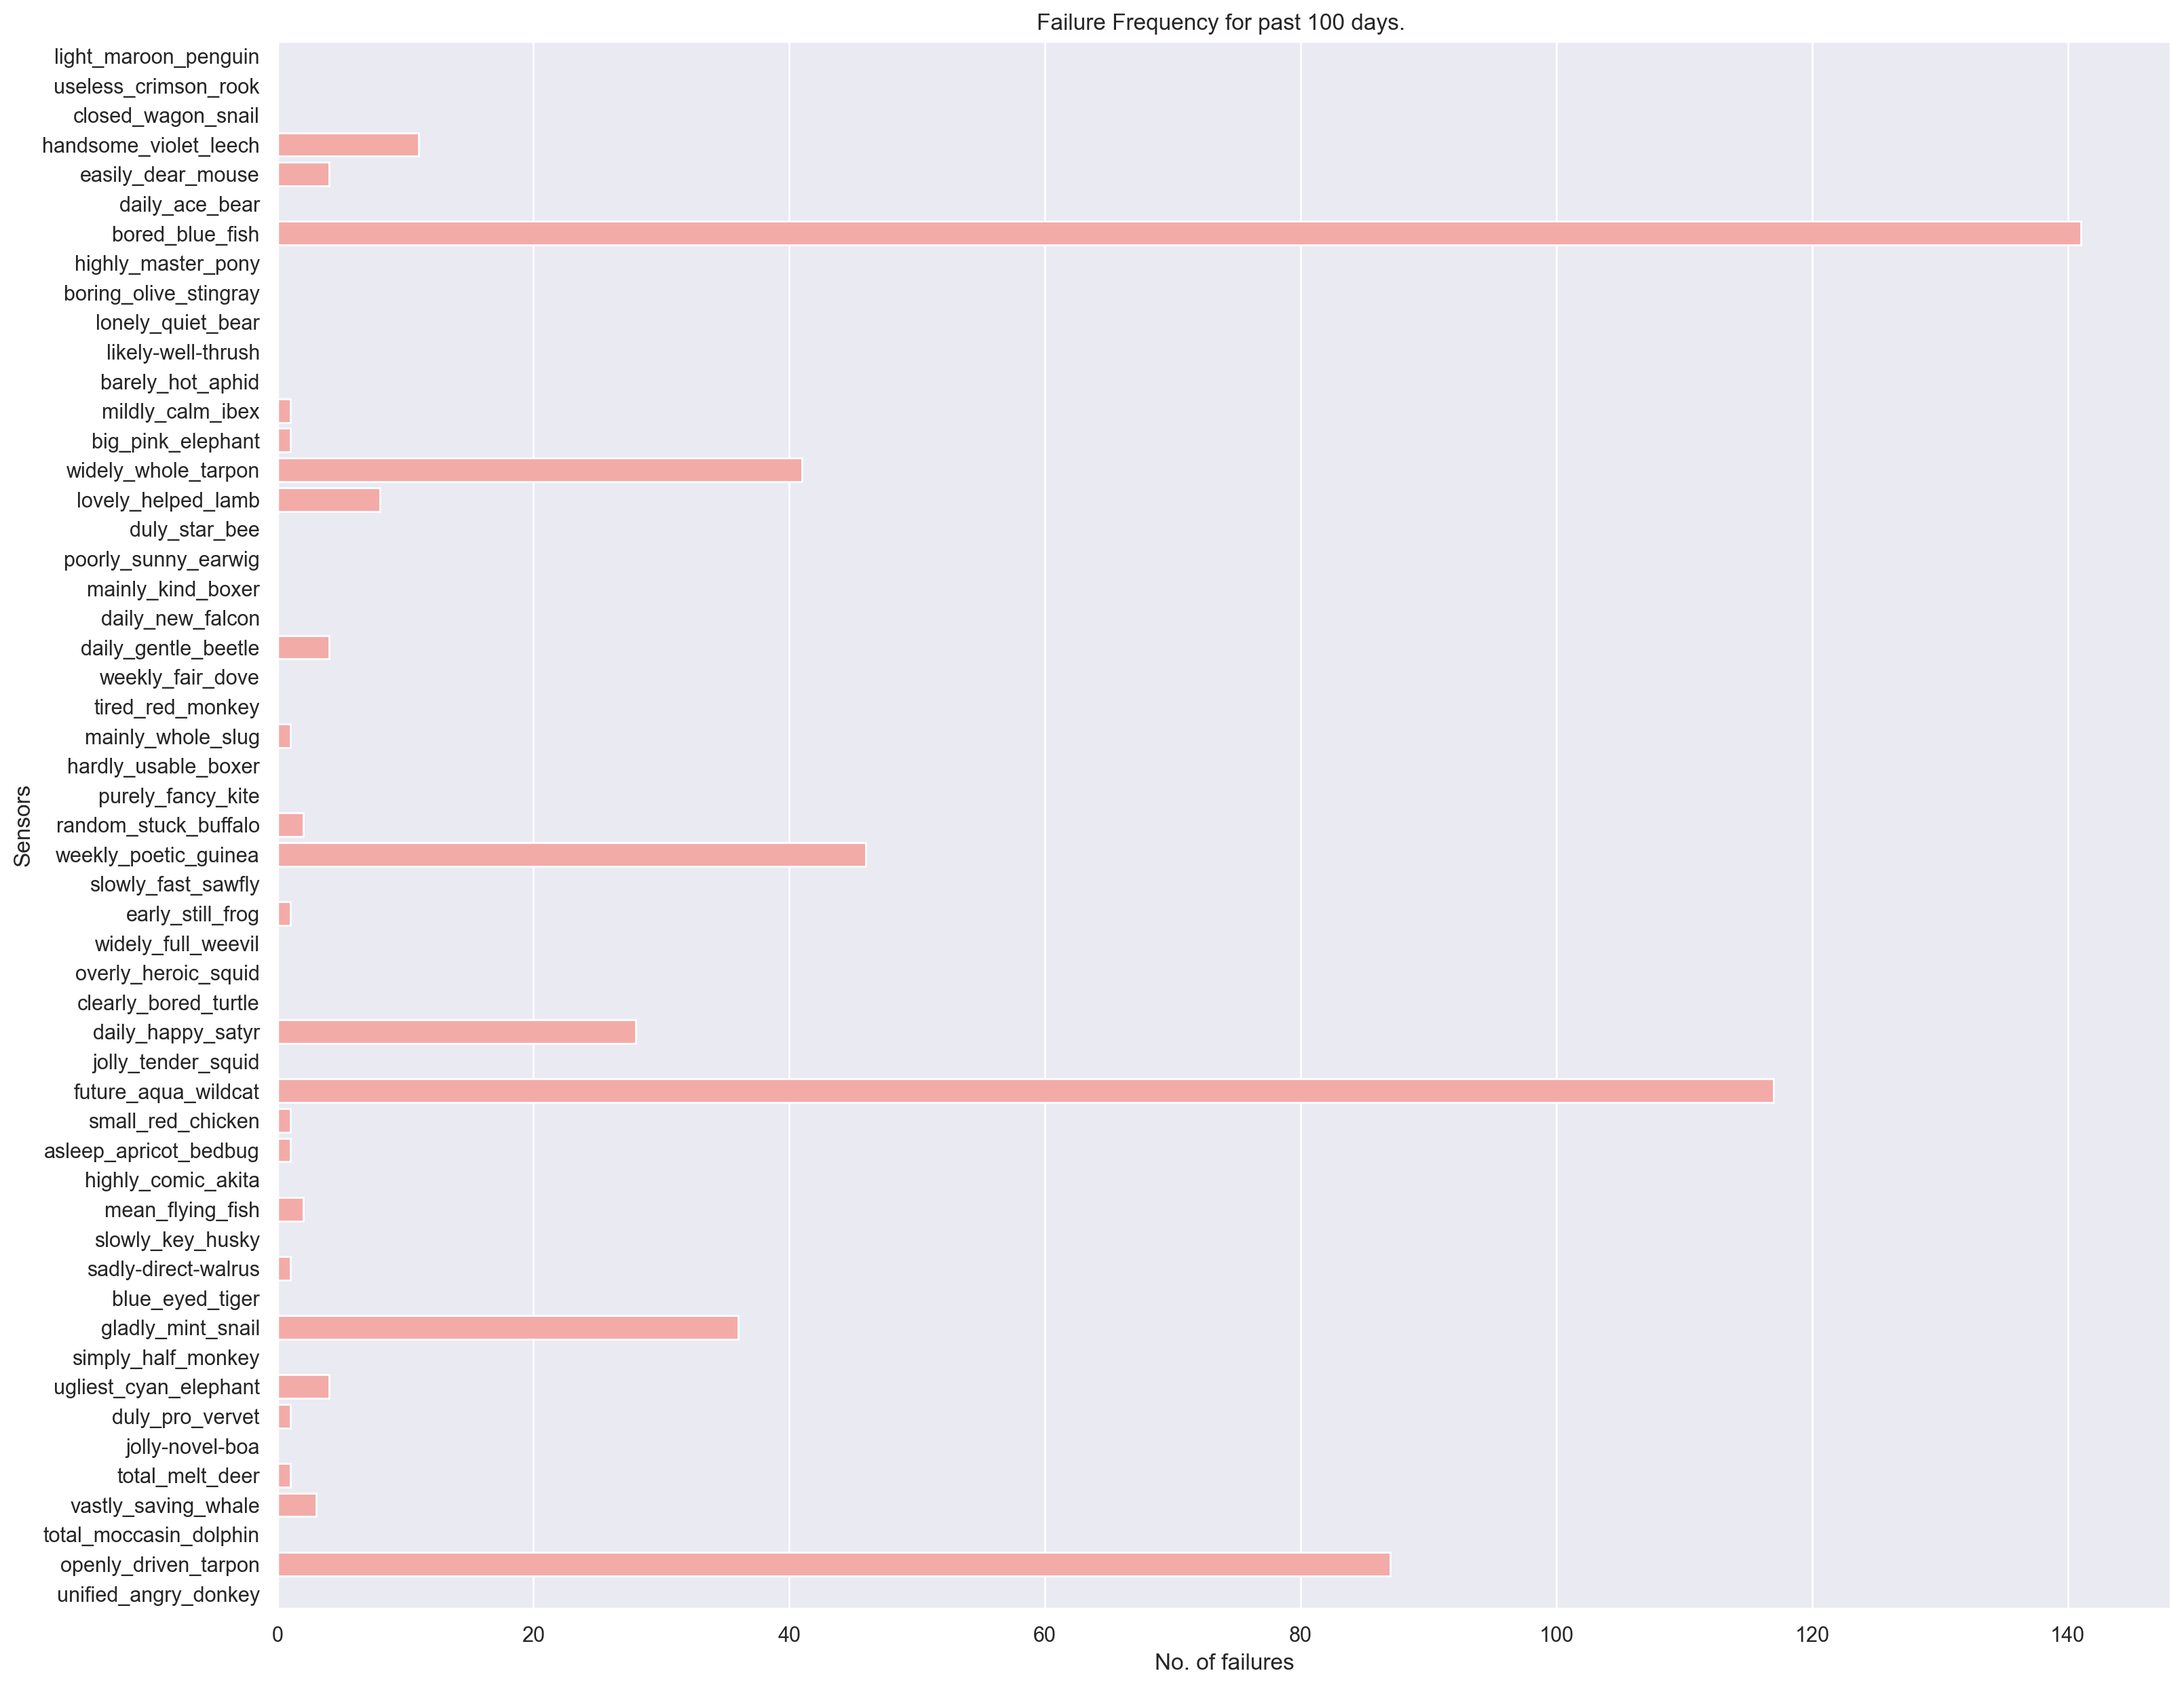

In [6]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(18,15)})
%config InlineBackend.figure_format = 'retina'

# plotting bar graph to see the frequency of failure for individual sensors

labels = list(failing_detail.keys())
heights = list(failing_detail.values())

sns.set_color_codes("pastel")
sns.barplot(x=heights, y=labels, label="Total", color="r", orient = 'h')
plt.title('Failure Frequency for past 100 days. ')
plt.ylabel('Sensors')
plt.xlabel('No. of failures')

Text(0.5, 1.0, 'Histogram of Number of failures')

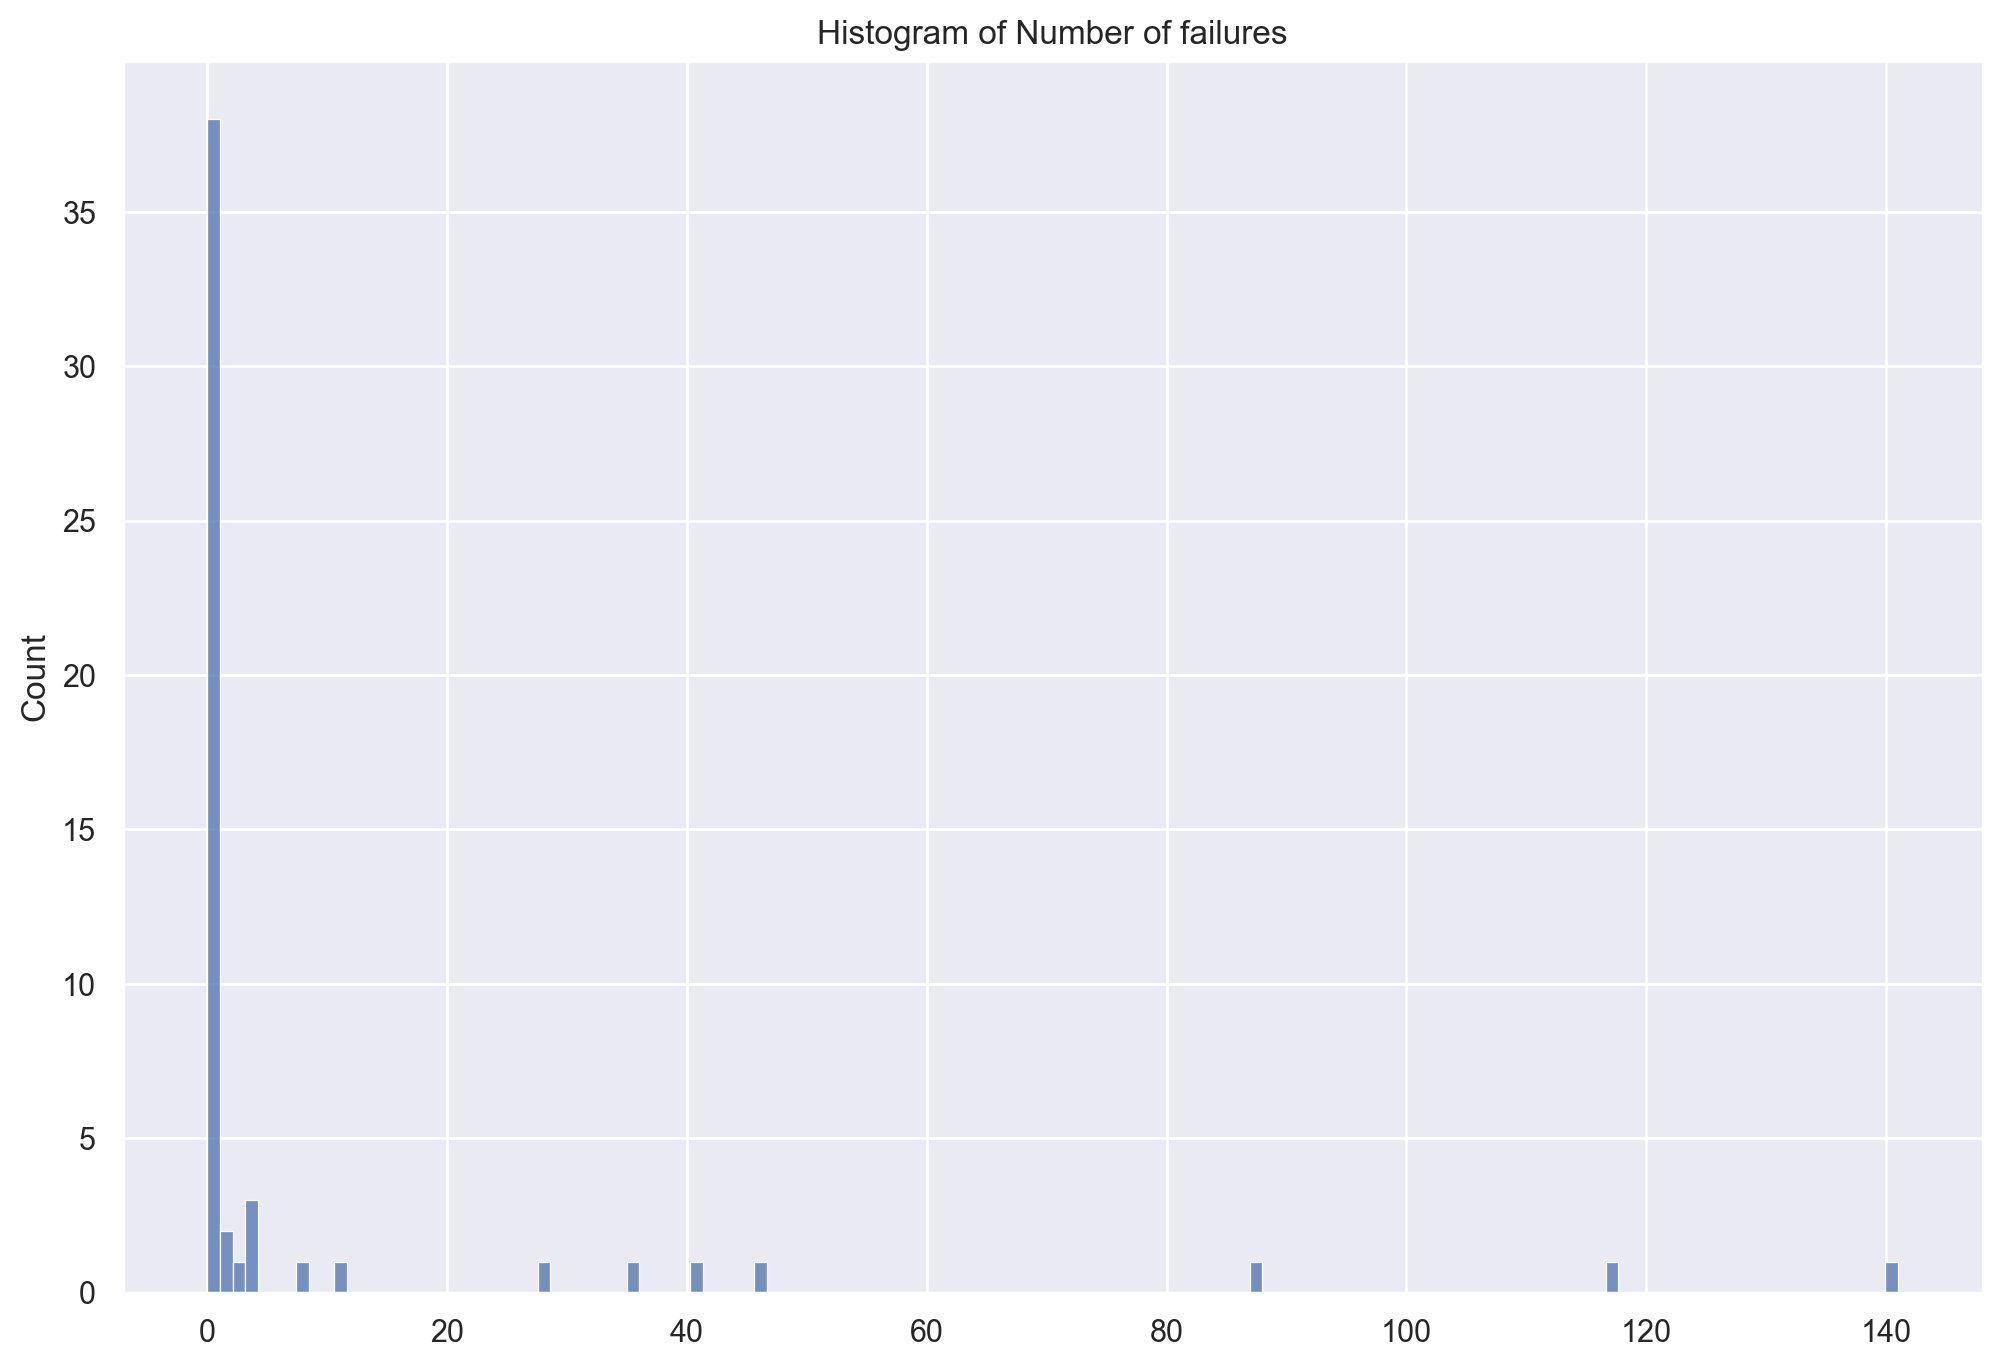

In [7]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.histplot(heights)
plt.title('Histogram of Number of failures')

It seems that most of the sensor failed only a few times but there are quite a few sensors that failed for 20+. times in last 30 days. It would be interesting to see their data and see what could be reason for that failure.

In [8]:
# getting the list of sensors that has failed more more than x times and the indexes associated with that failure

interested_frequency = 20
mostly_failing_data = {}

mostly_failing_sensor = []

for key, value in failing_detail.items():
    if value >=interested_frequency:
        mostly_failing_data[key] = missing[key]
        mostly_failing_sensor.append(key)
mostly_failing_sensor       

['bored_blue_fish',
 'widely_whole_tarpon',
 'weekly_poetic_guinea',
 'daily_happy_satyr',
 'future_aqua_wildcat',
 'gladly_mint_snail',
 'openly_driven_tarpon']

In [9]:
#%store mostly_failing_sensor

### Analyzing data for battery voltage

So, I am trying to grab 2 data points before and after the failure of the sensor and see if there is any alarming value in battery voltage. 

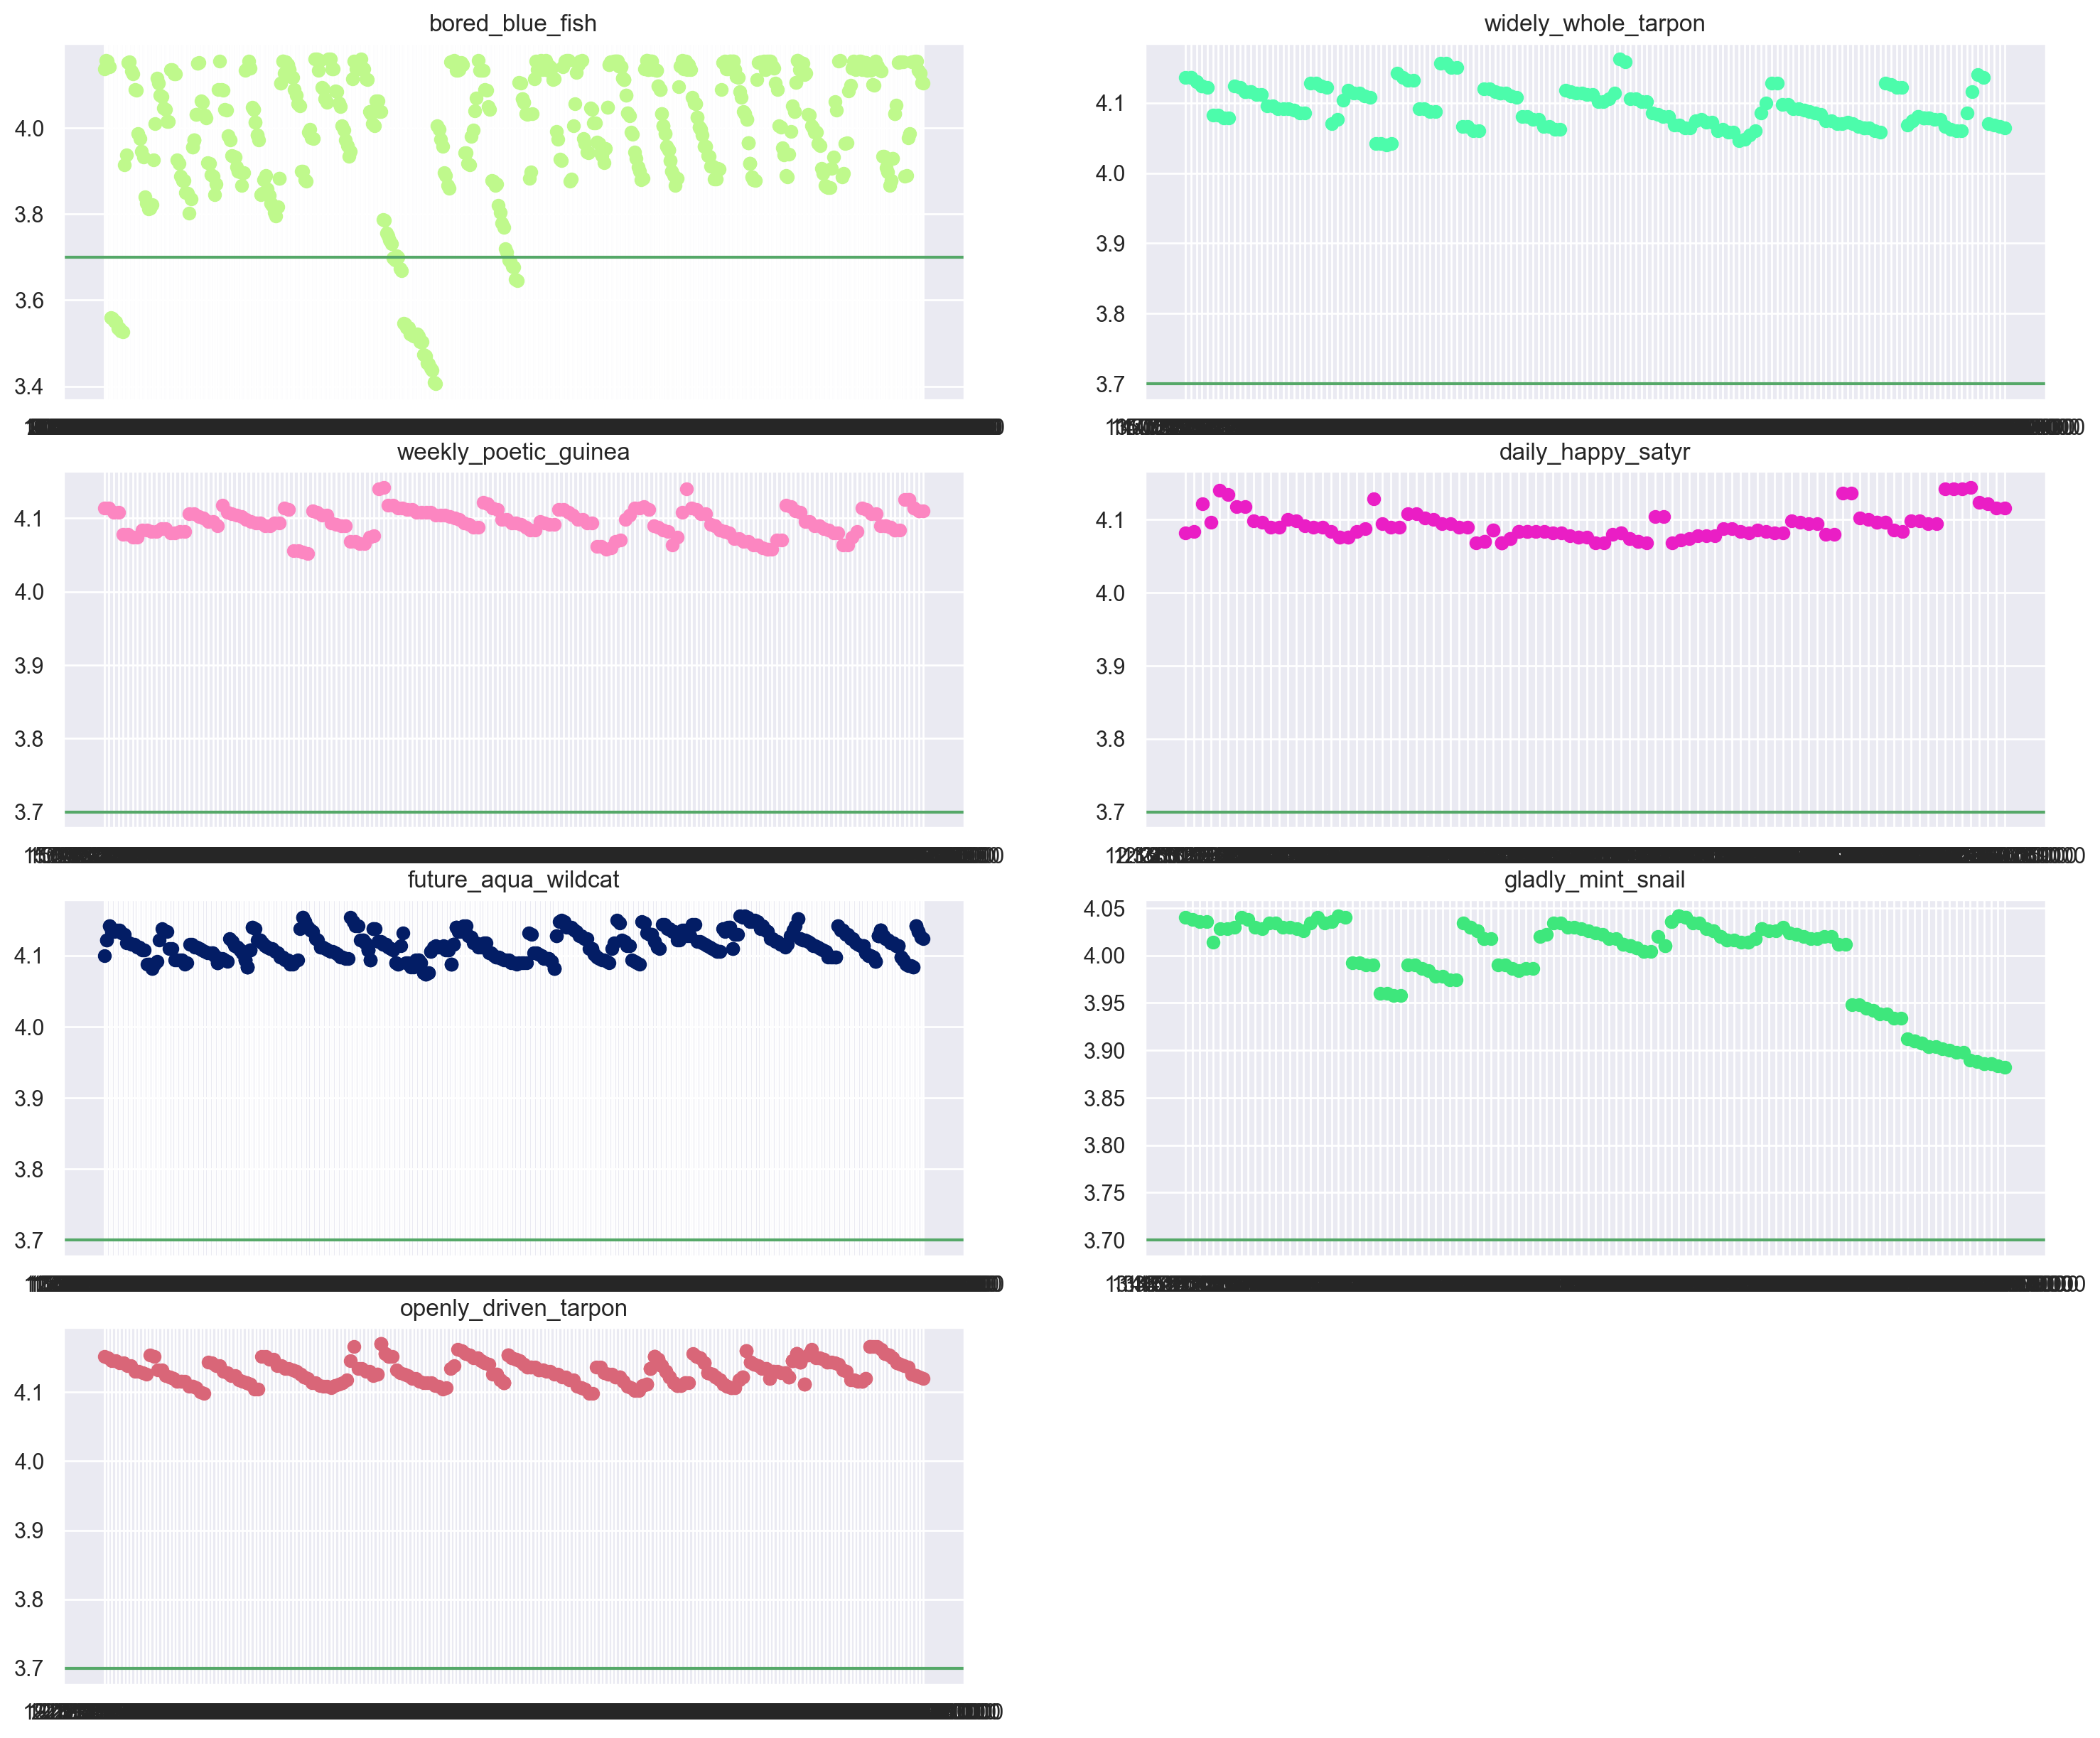

In [10]:
sns.set(rc = {'figure.figsize':(18,15)})
i = 1

for key, values in mostly_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) 
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
    plt.subplot(4,2, i)
    plt.title(key)
    plt.scatter(x = failing_df['times'], y = failing_df['batt_v'], color=np.random.rand(3,))
    plt.axhline(y=3.7, color = 'g')
    i += 1
plt.show()

## Observation:
It seems that battery voltage is not the reason of failure for sensors that failed more than 20 times. The reason is something else probably the gateway

### Now looking at other sensors

In [11]:
interested_frequency = 20
less_failing_data = {}

for key, value in failing_detail.items():
    if value > 0 and value < interested_frequency:
        less_failing_data[key] = missing[key]
print(len(less_failing_data))      
%store less_failing_data

17
Stored 'less_failing_data' (dict)


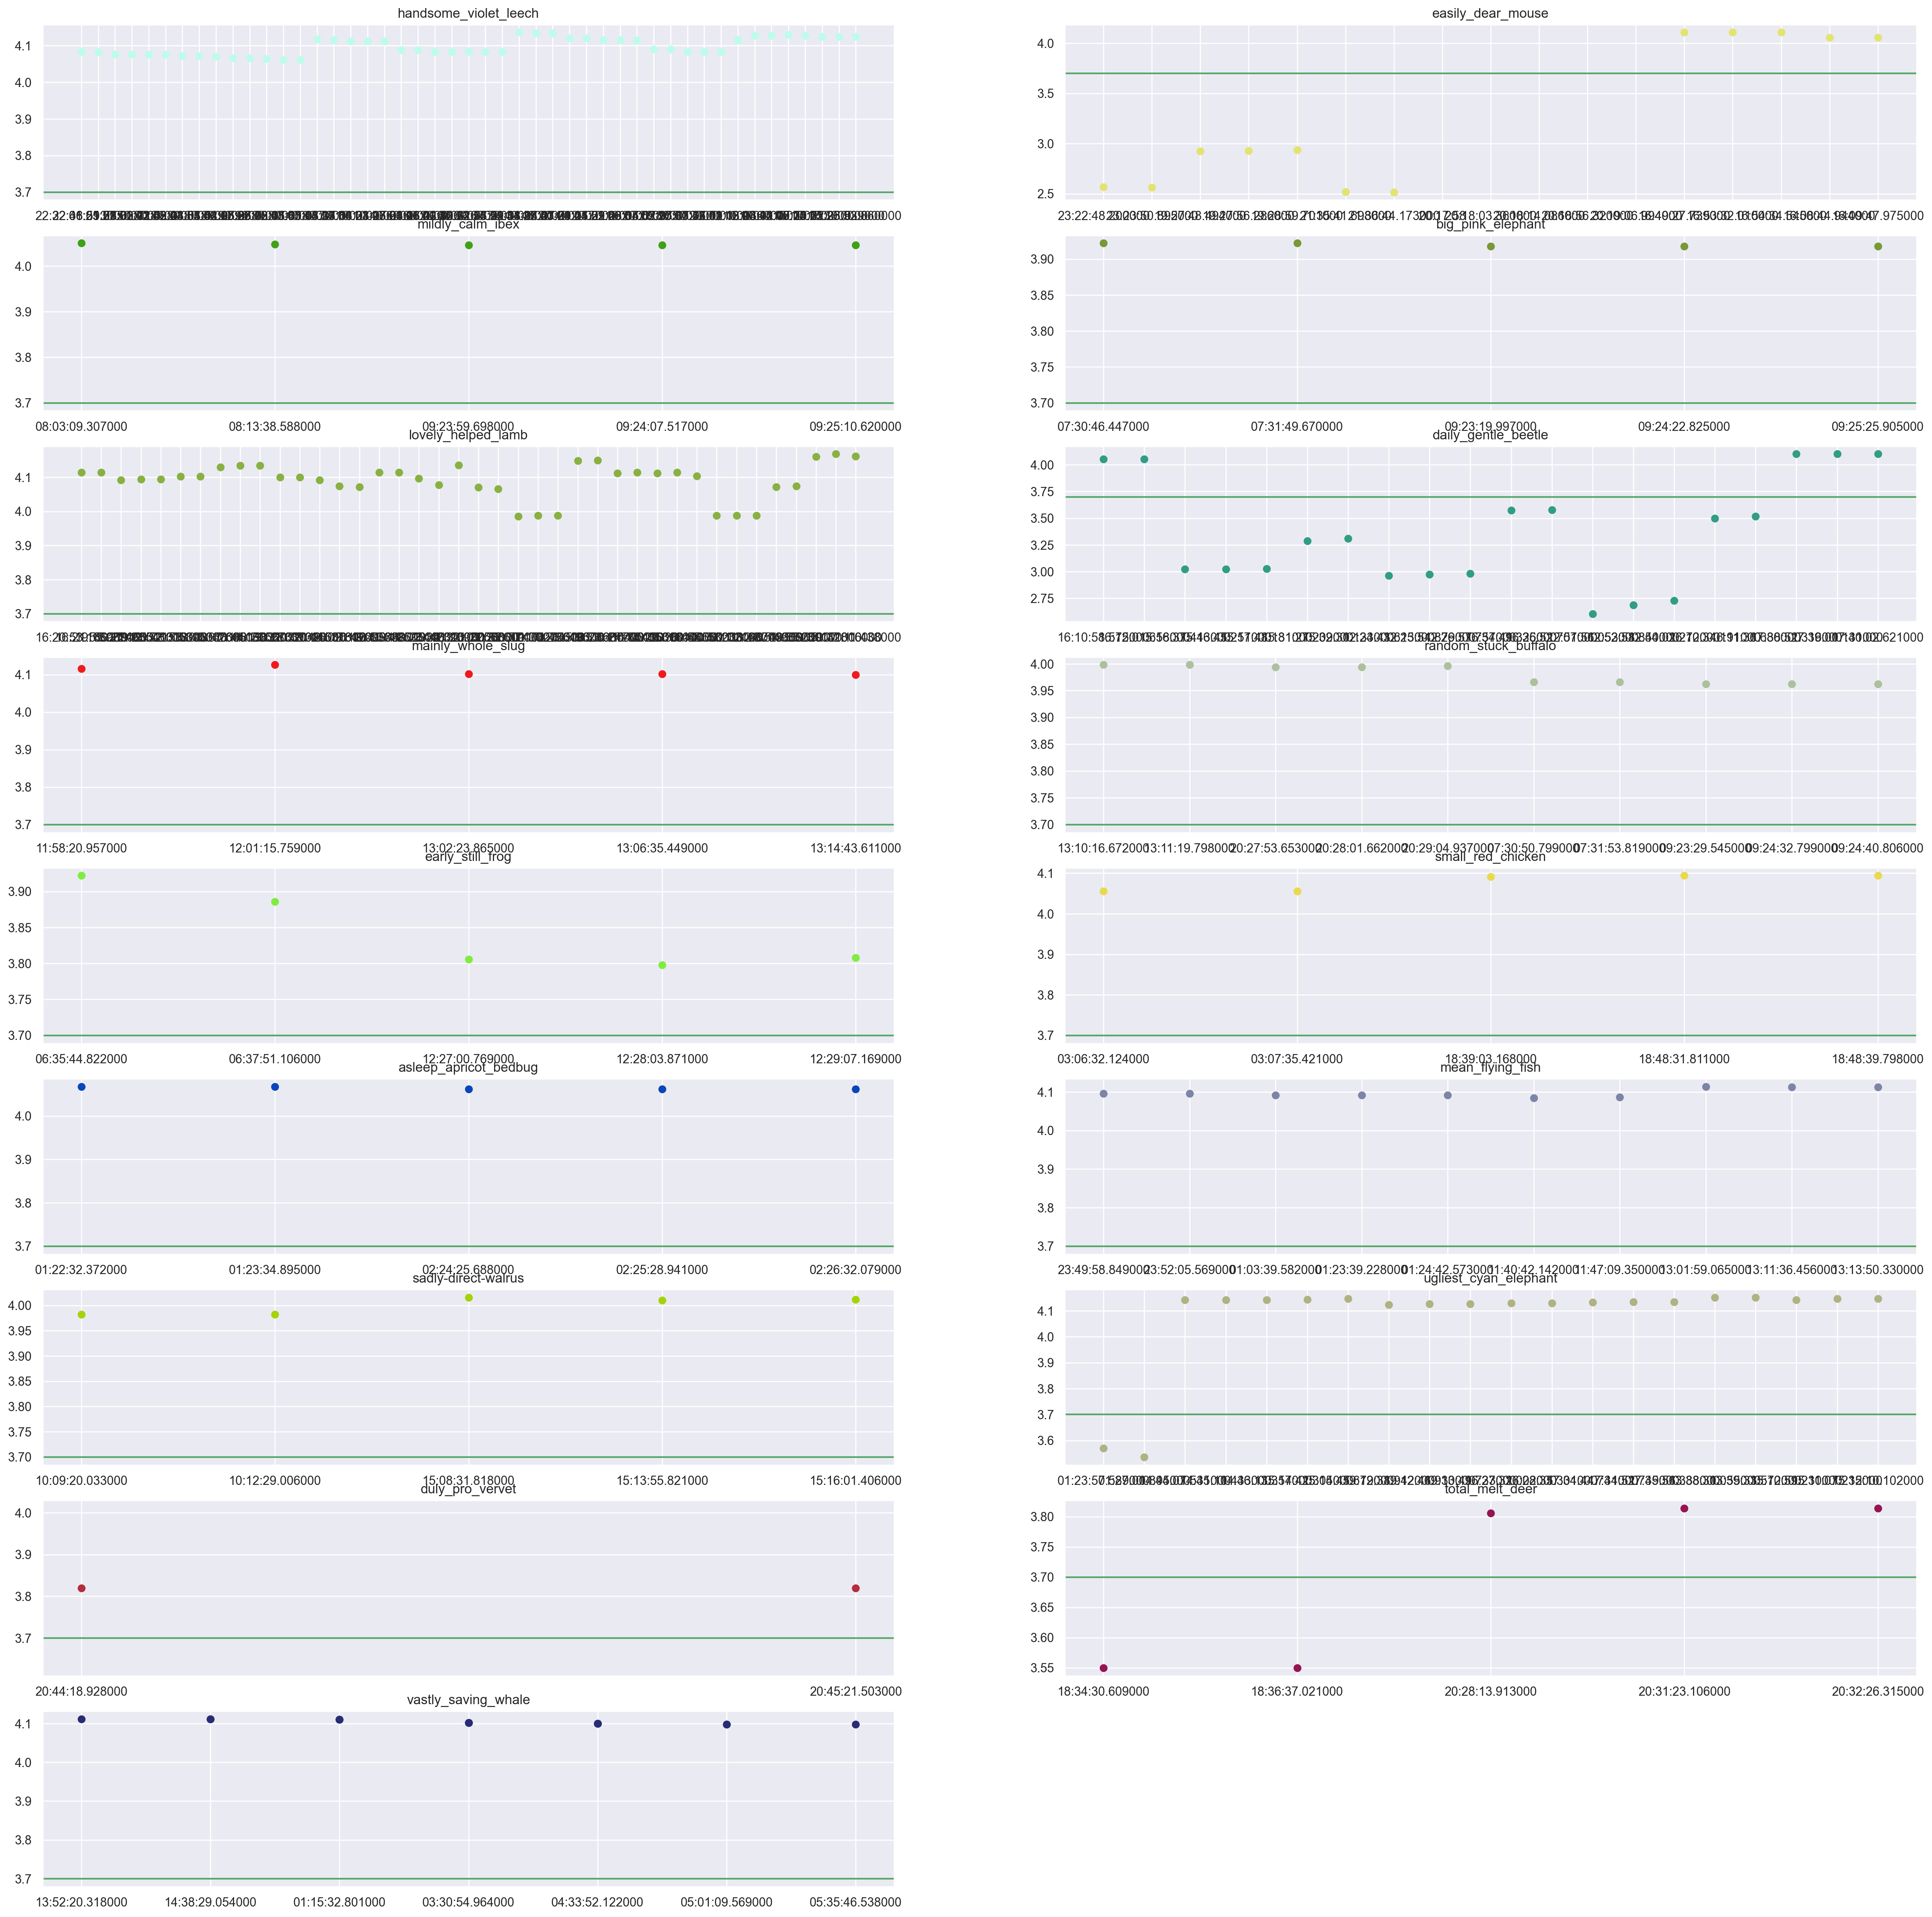

In [12]:
sns.set(rc = {'figure.figsize':(30,30)})

i = 1
for key, values in less_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) + list(np.asarray(index) + 2)
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
    plt.subplot(9,2, i)
    plt.title(key)
    plt.scatter(x = failing_df['times'], y = failing_df['batt_v'], color=np.random.rand(3,))
    plt.axhline(y=3.7, color = 'g')
    i += 1

## Doing Same analysis for RSSI

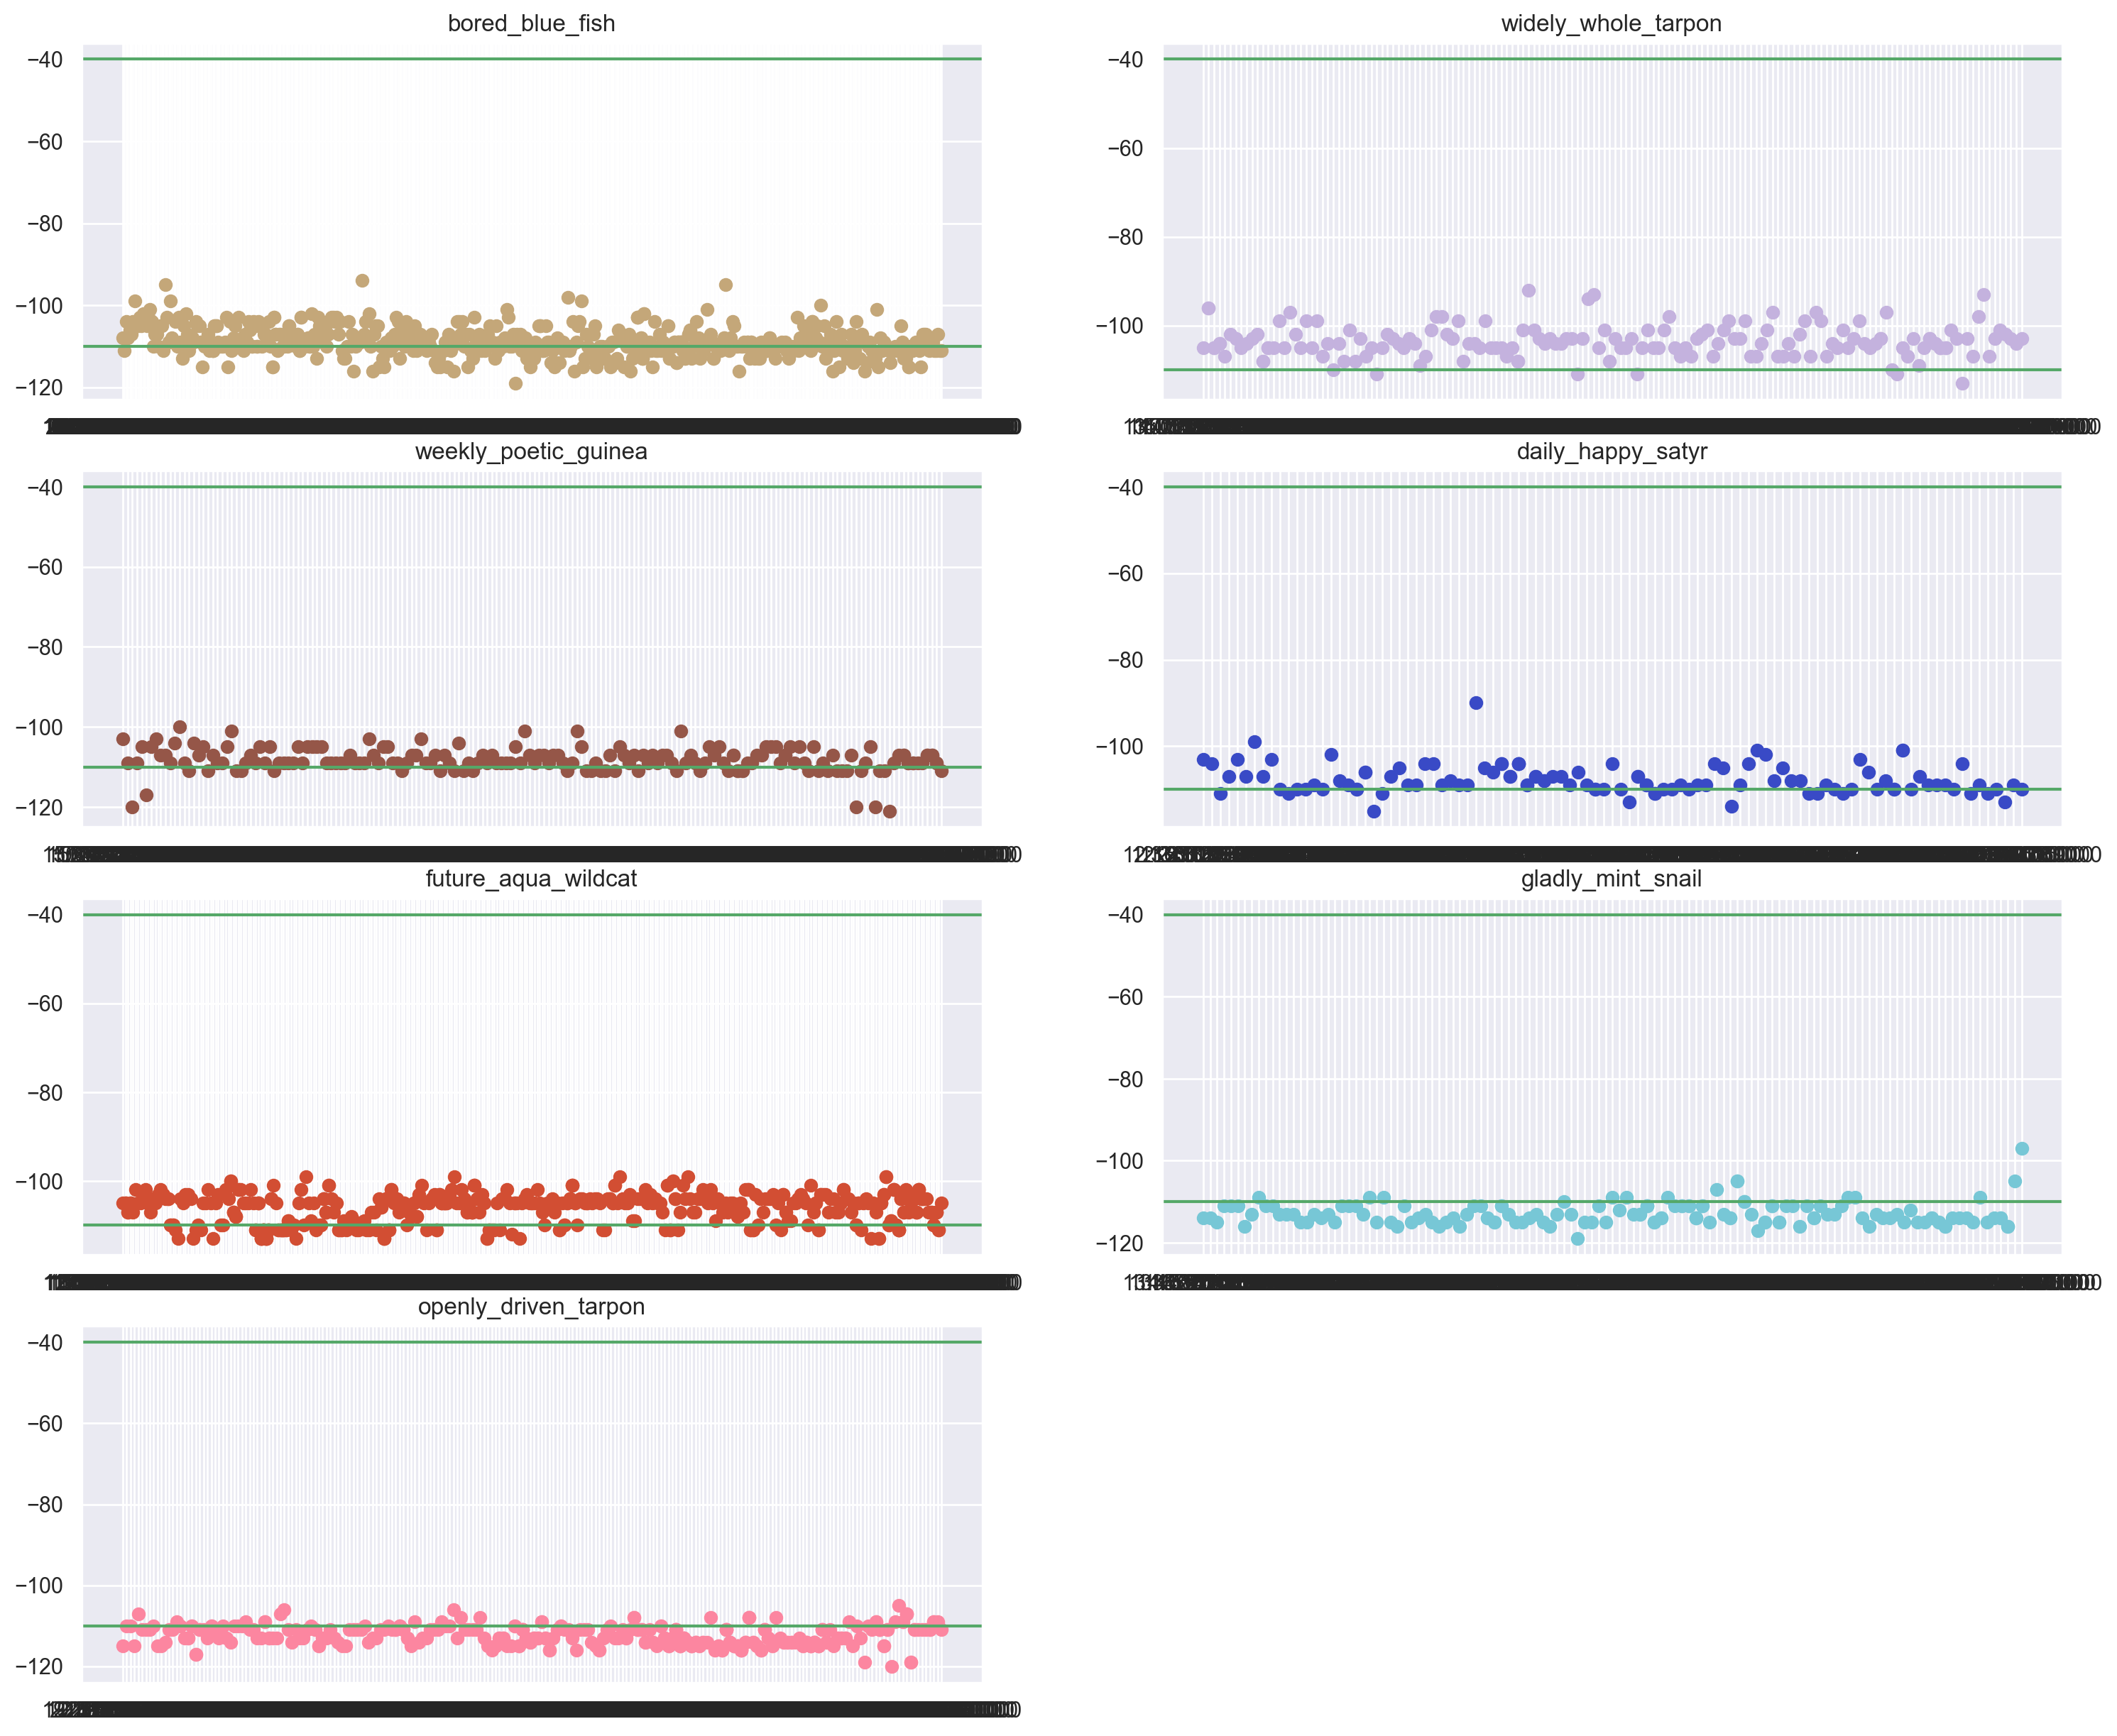

In [13]:
sns.set(rc = {'figure.figsize':(18,15)})
i = 1

for key, values in mostly_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) 
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
    plt.subplot(4,2, i)
    plt.title(key)
    plt.scatter(x = failing_df['times'], y = failing_df['gw_1_rssi_dbm'], color=np.random.rand(3,))
    plt.axhline(y=-40, color = 'g')
    plt.axhline(y=-110, color = 'g')
    i += 1
plt.show()

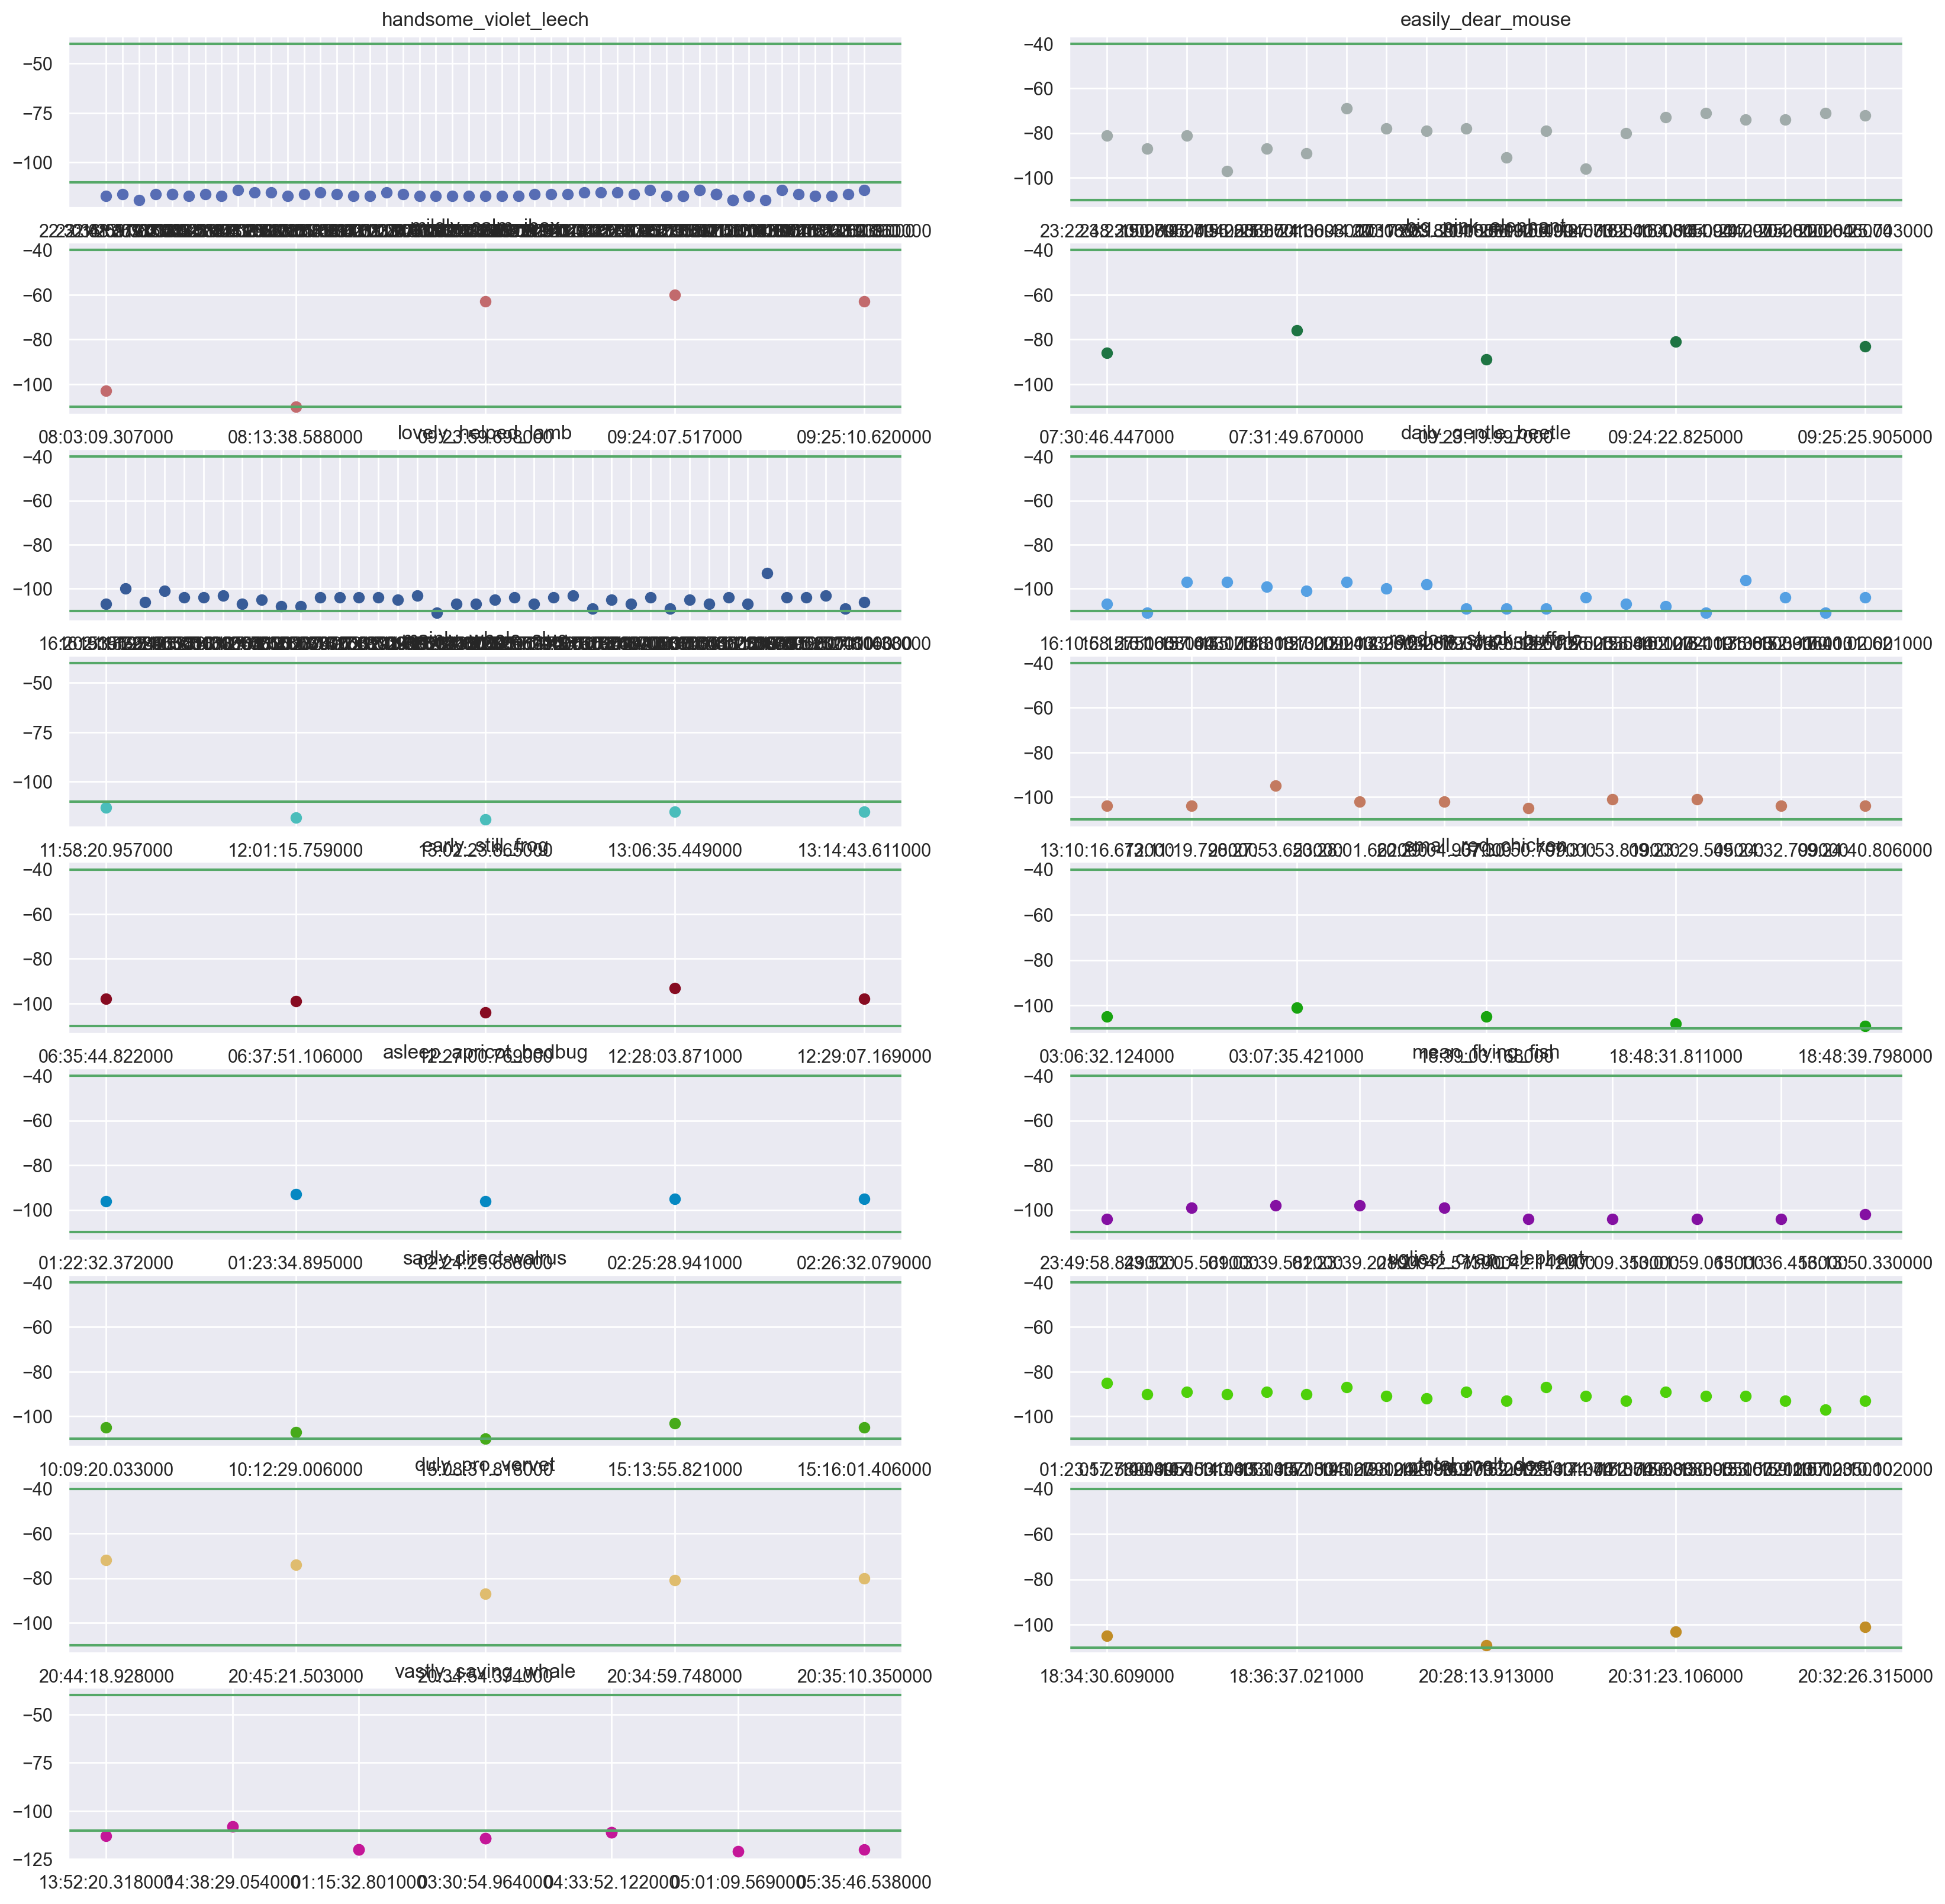

In [14]:
sns.set(rc = {'figure.figsize':(20,20)})

i = 1
for key, values in less_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) + list(np.asarray(index) + 2)
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
    plt.subplot(9,2, i)
    plt.title(key)
    plt.scatter(x = failing_df['times'], y = failing_df['gw_1_rssi_dbm'], color=np.random.rand(3,))
    plt.axhline(y=-40, color = 'g')
    plt.axhline(y=-110, color = 'g')
    i += 1

In [15]:
# looking into data for weird daily_gentle_beetle
index = list(less_failing_data['daily_gentle_beetle'])
interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) + list(np.asarray(index) + 2)
dfs = dataframes['daily_gentle_beetle']
dfs.loc[interested_index].sort_values('Unnamed: 0')

Unnamed: 0                             time        deployment_id  \
33213       33213 2023-05-06 16:10:58.575000+00:00  daily_gentle_beetle   
33214       33214 2023-05-06 16:12:01.658000+00:00  daily_gentle_beetle   
33215       33215 2023-06-05 15:16:37.443000+00:00  daily_gentle_beetle   
33216       33216 2023-06-05 15:16:45.251000+00:00  daily_gentle_beetle   
33217       33217 2023-06-05 15:17:48.181000+00:00  daily_gentle_beetle   
33229       33229 2023-06-05 15:31:27.209000+00:00  daily_gentle_beetle   
33230       33230 2023-06-05 15:32:30.133000+00:00  daily_gentle_beetle   
33231       33231 2023-06-08 12:24:43.613000+00:00  daily_gentle_beetle   
33232       33232 2023-06-08 12:25:54.879000+00:00  daily_gentle_beetle   
33233       33233 2023-06-08 12:26:57.757000+00:00  daily_gentle_beetle   
33454       33454 2023-06-08 16:34:49.326000+00:00  daily_gentle_beetle   
33455       33455 2023-06-08 16:35:52.707000+00:00  daily_gentle_beetle   
33456       33456 2023-06-09 12:51:56.053000+00:00  daily_gentle_beetle   
33457       33457 2023-06-09 12:52:58.840000+00:00  daily_gentle_beetle   
33458       33458 2023-06-09 12:54:02.272000+00:00  daily_gentle_beetle   
33622       33622 2023-06-09 16:10:34.191000+00:00  daily_gentle_beetle   
33623       33623 2023-06-09 16:11:36.680000+00:00  daily_gentle_beetle   
33624       33624 2023-06-14 17:38:52.316000+00:00  daily_gentle_beetle   
33625       33625 2023-06-14 17:39:00.131000+00:00  daily_gentle_beetle   
33626       33626 2023-06-14 17:40:02.621000+00:00  daily_gentle_beetle   

       error_flag  batt_v                           gw_1_id  dist_mm   f_cnt  \
33213         0.0   4.054         ttn-nyc-00-08-00-4a-67-fe   2735.0  6779.0   
33214         0.0   4.054                   mikrotik-003300   2739.0  6780.0   
33215         0.0   3.024  floodnet-lr9-gw-3235313229006900   2726.0     NaN   
33216         0.0   3.024  floodnet-lr9-gw-3235313229006900   2731.0     1.0   
33217         0.0   3.028  floodnet-lr9-gw-3235313229006900   2730.0     2.0   
33229         0.0   3.286  floodnet-lr9-gw-3235313229006900   2731.0    15.0   
33230         0.0   3.310  floodnet-lr9-gw-3235313229006900   2733.0    16.0   
33231         0.0   2.964  floodnet-lr9-gw-3235313229006900   2734.0     NaN   
33232         0.0   2.974  floodnet-lr9-gw-3235313229006900   2728.0     2.0   
33233         0.0   2.982         ttn-nyc-00-08-00-4a-67-fe   2728.0     3.0   
33454         0.0   3.574         ttn-nyc-00-08-00-4a-67-fe   2745.0   241.0   
33455         0.0   3.576         ttn-nyc-00-08-00-4a-67-fe   2743.0   242.0   
33456         0.0   2.606  floodnet-lr9-gw-3235313229006900   2734.0     NaN   
33457         0.0   2.686                   mikrotik-003300   2734.0     1.0   
33458         0.0   2.728         ttn-nyc-00-08-00-4a-67-fe   2735.0     2.0   
33622         0.0   3.500         ttn-nyc-00-08-00-4a-67-fe   2741.0   190.0   
33623         0.0   3.516  floodnet-lr9-gw-3235313229006900   2729.0   191.0   
33624         0.0   4.100                         kona-mega   2726.0     1.0   
33625         0.0   4.100                   mikrotik-003300   2727.0     2.0   
33626         0.0   4.100  floodnet-lr9-gw-3235313229006900   2726.0     3.0   

       gw_1_rssi_dbm  gw_1_snr_db            times        date  
33213           -107         3.00  16:10:58.575000  2023-05-06  
33214           -111        -3.50  16:12:01.658000  2023-05-06  
33215            -97         3.50  15:16:37.443000  2023-06-05  
33216            -97        -1.75  15:16:45.251000  2023-06-05  
33217            -99         3.00  15:17:48.181000  2023-06-05  
33229           -101         3.00  15:31:27.209000  2023-06-05  
33230            -97        -3.75  15:32:30.133000  2023-06-05  
33231           -100        -5.50  12:24:43.613000  2023-06-08  
33232            -98        -7.25  12:25:54.879000  2023-06-08  
33233           -109        -3.50  12:26:57.757000  2023-06-08  
33454           -109        -5.00  

In [16]:
index = list(less_failing_data['ugliest_cyan_elephant'])
interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) + list(np.asarray(index) + 2)
dfs = dataframes['ugliest_cyan_elephant']
dfs.loc[interested_index].sort_values('Unnamed: 0')

Unnamed: 0                             time          deployment_id  \
17934       17934 2023-04-30 01:23:57.589000+00:00  ugliest_cyan_elephant   
17935       17935 2023-04-30 01:27:00.895000+00:00  ugliest_cyan_elephant   
17936       17936 2023-05-22 14:44:07.531000+00:00  ugliest_cyan_elephant   
17937       17937 2023-05-22 14:45:10.433000+00:00  ugliest_cyan_elephant   
17938       17938 2023-05-22 14:46:13.357000+00:00  ugliest_cyan_elephant   
24653       24653 2023-05-27 15:14:42.304000+00:00  ugliest_cyan_elephant   
24654       24654 2023-05-27 15:15:45.679000+00:00  ugliest_cyan_elephant   
24655       24655 2023-05-31 19:12:38.942000+00:00  ugliest_cyan_elephant   
24656       24656 2023-05-31 19:12:46.930000+00:00  ugliest_cyan_elephant   
24657       24657 2023-05-31 19:13:49.733000+00:00  ugliest_cyan_elephant   
41960       41960 2023-06-13 16:27:32.002000+00:00  ugliest_cyan_elephant   
41961       41961 2023-06-13 16:28:35.301000+00:00  ugliest_cyan_elephant   
41962       41962 2023-06-14 17:34:44.741000+00:00  ugliest_cyan_elephant   
41963       41963 2023-06-14 17:34:52.749000+00:00  ugliest_cyan_elephant   
41964       41964 2023-06-14 17:35:56.388000+00:00  ugliest_cyan_elephant   
44439       44439 2023-06-16 13:38:30.055000+00:00  ugliest_cyan_elephant   
44440       44440 2023-06-16 13:39:33.572000+00:00  ugliest_cyan_elephant   
44441       44441 2023-06-23 15:10:59.230000+00:00  ugliest_cyan_elephant   
44442       44442 2023-06-23 15:11:07.235000+00:00  ugliest_cyan_elephant   
44443       44443 2023-06-23 15:12:10.102000+00:00  ugliest_cyan_elephant   

       error_flag  batt_v     gw_1_id  dist_mm    f_cnt  gw_1_rssi_dbm  \
17934           0   3.570  fngw-10003   1817.0  61773.0          -85.0   
17935           0   3.536  fngw-10003   1819.0  61774.0          -90.0   
17936           0   4.142  fngw-10003   1864.0     15.0          -89.0   
17937           0   4.142  fngw-10003   1864.0     16.0          -90.0   
17938           0   4.142  fngw-10003   1864.0     17.0          -89.0   
24653           0   4.144  fngw-10003   1870.0     44.0          -90.0   
24654           0   4.146  fngw-10003   1873.0     45.0          -87.0   
24655           0   4.124  fngw-10003   1873.0      NaN          -91.0   
24656           0   4.126  fngw-10003   1873.0      1.0          -92.0   
24657           0   4.126  fngw-10003   1872.0      2.0          -89.0   
41960           0   4.130  fngw-10003   1782.0     31.0          -93.0   
41961           0   4.130  fngw-10003   1788.0     32.0          -87.0   
41962           0   4.132  fngw-10003   1790.0      NaN          -91.0   
41963           0   4.134  fngw-10003   1793.0      1.0          -93.0   
41964           0   4.134  fngw-10003   1790.0      2.0          -89.0   
44439           0   4.152  fngw-10003   1867.0    151.0          -91.0   
44440           0   4.152  fngw-10003   1865.0    152.0          -91.0   
44441           0   4.142  fngw-10003   1840.0      NaN          -93.0   
44442           0   4.146  fngw-10003   1838.0      1.0          -97.0   
44443           0   4.146  fngw-10003   1839.0      2.0          -93.0   

       gw_1_snr_db            times        date  
17934         8.25  01:23:57.589000  2023-04-30  
17935         7.75  01:27:00.895000  2023-04-30  
17936         8.25  14:44:07.531000  2023-05-22  
17937         7.75  14:45:10.433000  2023-05-22  
17938         6.50  14:46:13.357000  2023-05-22  
24653         8.75  15:14:42.304000  2023-05-27  
24654         7.75  15:15:45.679000  2023-05-27  
24655         6.50  19:12:38.942000  2023-05-31  
24656         6.50  19:12:46.930000  2023-05-31  
24657         8.75  19:13:49.733000  2023-05-31  
41960         6.50  16:27:32.002000  2023-06-13  
41961         8.75  16:28:35.301000  2023-06-13  
41962         5.00  17:34:44.741000  2023-06-14  
41963         6.00  17:34:52.749000  2023-06-14  
41964         7.75  17:35:56.388000  2023-06-14  
44439         6.50  13:38:30.05500

In [17]:
list(mostly_failing_data.keys()) + list(less_failing_data.keys())

['bored_blue_fish',
 'widely_whole_tarpon',
 'weekly_poetic_guinea',
 'daily_happy_satyr',
 'future_aqua_wildcat',
 'gladly_mint_snail',
 'openly_driven_tarpon',
 'handsome_violet_leech',
 'easily_dear_mouse',
 'mildly_calm_ibex',
 'big_pink_elephant',
 'lovely_helped_lamb',
 'daily_gentle_beetle',
 'mainly_whole_slug',
 'random_stuck_buffalo',
 'early_still_frog',
 'small_red_chicken',
 'asleep_apricot_bedbug',
 'mean_flying_fish',
 'sadly-direct-walrus',
 'ugliest_cyan_elephant',
 'duly_pro_vervet',
 'total_melt_deer',
 'vastly_saving_whale']

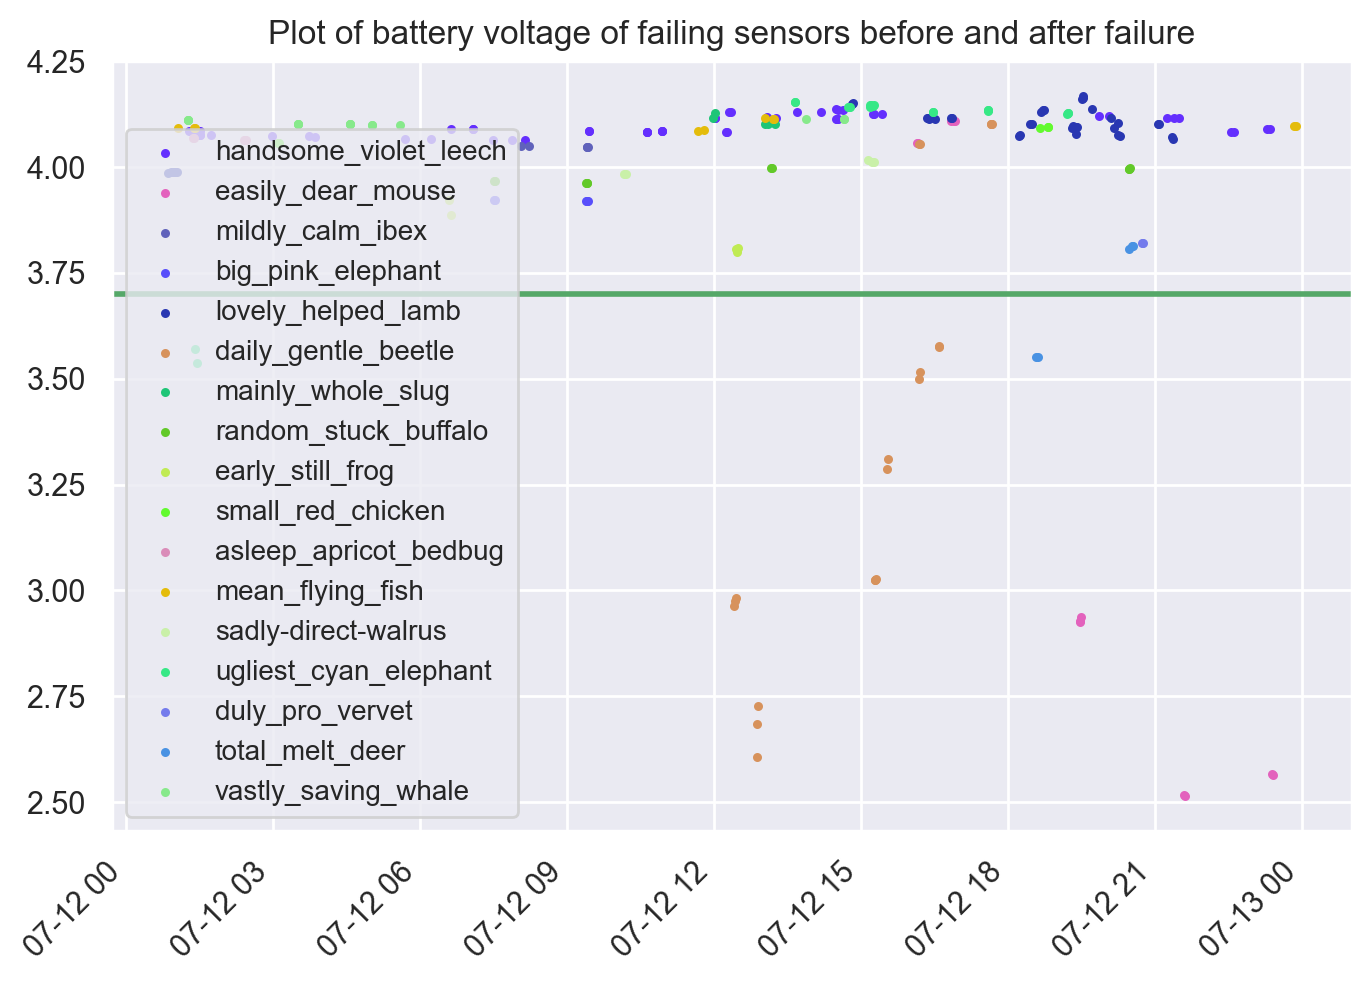

In [18]:
## plotting battery voltage data for all of the sensors

sns.set(rc = {'figure.figsize':(8,5)})

i = 1
for key, values in less_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) + list(np.asarray(index) + 2)
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
    #plt.title(key)
    plt.scatter(x = pd.to_datetime(failing_df['times']), y = failing_df['batt_v'], color=np.random.rand(3,), label=key, s=5)
    plt.axhline(y=3.7, color = 'g')


# for key, values in mostly_failing_data.items():
#     index = list(values)
#     interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) + list(np.asarray(index) + 2)
#     failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
#     #plt.title(key)
#     plt.scatter(x = pd.to_datetime(failing_df['times']), y = failing_df['batt_v'], color=np.random.rand(3,), label=key, s=5)
#     plt.axhline(y=3.7, color = 'g')


plt.xticks(rotation=45, ha='right')
plt.title('Plot of battery voltage of failing sensors before and after failure')
plt.legend(fontsize='small', loc='lower left')
plt.show()

In [19]:
pd.to_datetime(failing_df['times'])

98756   2023-07-12 13:52:20.318
98757   2023-07-12 14:38:29.054
98757   2023-07-12 14:38:29.054
98758   2023-07-12 01:15:32.801
98758   2023-07-12 01:15:32.801
98758   2023-07-12 01:15:32.801
98759   2023-07-12 03:30:54.964
98759   2023-07-12 03:30:54.964
98759   2023-07-12 03:30:54.964
98760   2023-07-12 04:33:52.122
98760   2023-07-12 04:33:52.122
98760   2023-07-12 04:33:52.122
98761   2023-07-12 05:01:09.569
98761   2023-07-12 05:01:09.569
98762   2023-07-12 05:35:46.538
Name: times, dtype: datetime64[ns]

In [20]:
failing_df

Unnamed: 0                             time        deployment_id  \
98756       98756 2023-06-27 13:52:20.318000+00:00  vastly_saving_whale   
98757       98757 2023-06-27 14:38:29.054000+00:00  vastly_saving_whale   
98757       98757 2023-06-27 14:38:29.054000+00:00  vastly_saving_whale   
98758       98758 2023-06-28 01:15:32.801000+00:00  vastly_saving_whale   
98758       98758 2023-06-28 01:15:32.801000+00:00  vastly_saving_whale   
98758       98758 2023-06-28 01:15:32.801000+00:00  vastly_saving_whale   
98759       98759 2023-06-28 03:30:54.964000+00:00  vastly_saving_whale   
98759       98759 2023-06-28 03:30:54.964000+00:00  vastly_saving_whale   
98759       98759 2023-06-28 03:30:54.964000+00:00  vastly_saving_whale   
98760       98760 2023-06-28 04:33:52.122000+00:00  vastly_saving_whale   
98760       98760 2023-06-28 04:33:52.122000+00:00  vastly_saving_whale   
98760       98760 2023-06-28 04:33:52.122000+00:00  vastly_saving_whale   
98761       98761 2023-06-28 05:01:09.569000+00:00  vastly_saving_whale   
98761       98761 2023-06-28 05:01:09.569000+00:00  vastly_saving_whale   
98762       98762 2023-06-28 05:35:46.538000+00:00  vastly_saving_whale   

       error_flag  batt_v                    gw_1_id  dist_mm     f_cnt  \
98756           0   4.112       eui-343632383e001c00   2509.0  482959.0   
98757           0   4.112       eui-343632383e001c00   2508.0  483003.0   
98757           0   4.112       eui-343632383e001c00   2508.0  483003.0   
98758           0   4.110  ttn-nyc-00-08-00-4a-43-21   2508.0  483610.0   
98758           0   4.110  ttn-nyc-00-08-00-4a-43-21   2508.0  483610.0   
98758           0   4.110  ttn-nyc-00-08-00-4a-43-21   2508.0  483610.0   
98759           0   4.102       eui-343632383e001c00   2503.0  483739.0   
98759           0   4.102       eui-343632383e001c00   2503.0  483739.0   
98759           0   4.102       eui-343632383e001c00   2503.0  483739.0   
98760           0   4.100       eui-343632383e001c00   2500.0  483799.0   
98760           0   4.100       eui-343632383e001c00   2500.0  483799.0   
98760           0   4.100       eui-343632383e001c00   2500.0  483799.0   
98761           0   4.098  ttn-nyc-00-08-00-4a-43-21   2503.0  483825.0   
98761           0   4.098  ttn-nyc-00-08-00-4a-43-21   2503.0  483825.0   
98762           0   4.098  ttn-nyc-00-08-00-4a-43-21   2503.0  483858.0   

       gw_1_rssi_dbm  gw_1_snr_db            times        date  
98756         -113.0        -7.00  13:52:20.318000  2023-06-27  
98757         -108.0        -8.25  14:38:29.054000  2023-06-27  
98757         -108.0        -8.25  14:38:29.054000  2023-06-27  
98758         -120.0        -8.25  01:15:32.801000  2023-06-28  
98758         -120.0        -8.25  01:15:32.801000  2023-06-28  
98758         -120.0        -8.25  01:15:32.801000  2023-06-28  
98759         -114.0        -7.75  03:30:54.964000  2023-06-28  
98759         -114.0        -7.75  03:30:54.964000  2023-06-28  
98759         -114.0        -7.75  03:30:54.964000  2023-06-28  
98760         -111.0        -7.00  04:33:52.122000  2023-06-28  
98760         -111.0        -7.00  04:33:52.122000  2023-06-28  
98760         -111.0        -7.00  04:33:52.122000  2023-06-28  
98761         -121.0        -6.50  05:01:09.569000  2023-06-28  
98761         -121.0        -6.50  05:01:09.569000  2023-06-28  
98762         -120.0        -7.25  05:35:46.538000  2023-06-28

In [21]:
less_failing_data

{'handsome_violet_leech': Int64Index([97990, 97994, 98010, 98051, 98115, 98182, 98235, 98459, 98460,
             98462, 98484],
            dtype='int64'),
 'easily_dear_mouse': Int64Index([16287, 17712, 17720, 19028], dtype='int64'),
 'mildly_calm_ibex': Int64Index([136155], dtype='int64'),
 'big_pink_elephant': Int64Index([133814], dtype='int64'),
 'lovely_helped_lamb': Int64Index([478, 2279, 10037, 10618, 11827, 12210, 12257, 12668], dtype='int64'),
 'daily_gentle_beetle': Int64Index([33215, 33231, 33456, 33624], dtype='int64'),
 'mainly_whole_slug': Int64Index([40672], dtype='int64'),
 'random_stuck_buffalo': Int64Index([14184, 60815], dtype='int64'),
 'early_still_frog': Int64Index([4398], dtype='int64'),
 'small_red_chicken': Int64Index([15656], dtype='int64'),
 'asleep_apricot_bedbug': Int64Index([57868], dtype='int64'),
 'mean_flying_fish': Int64Index([83415, 83462], dtype='int64'),
 'sadly-direct-walrus': Int64Index([50014], dtype='int64'),
 'ugliest_cyan_elephant': Int64Inde

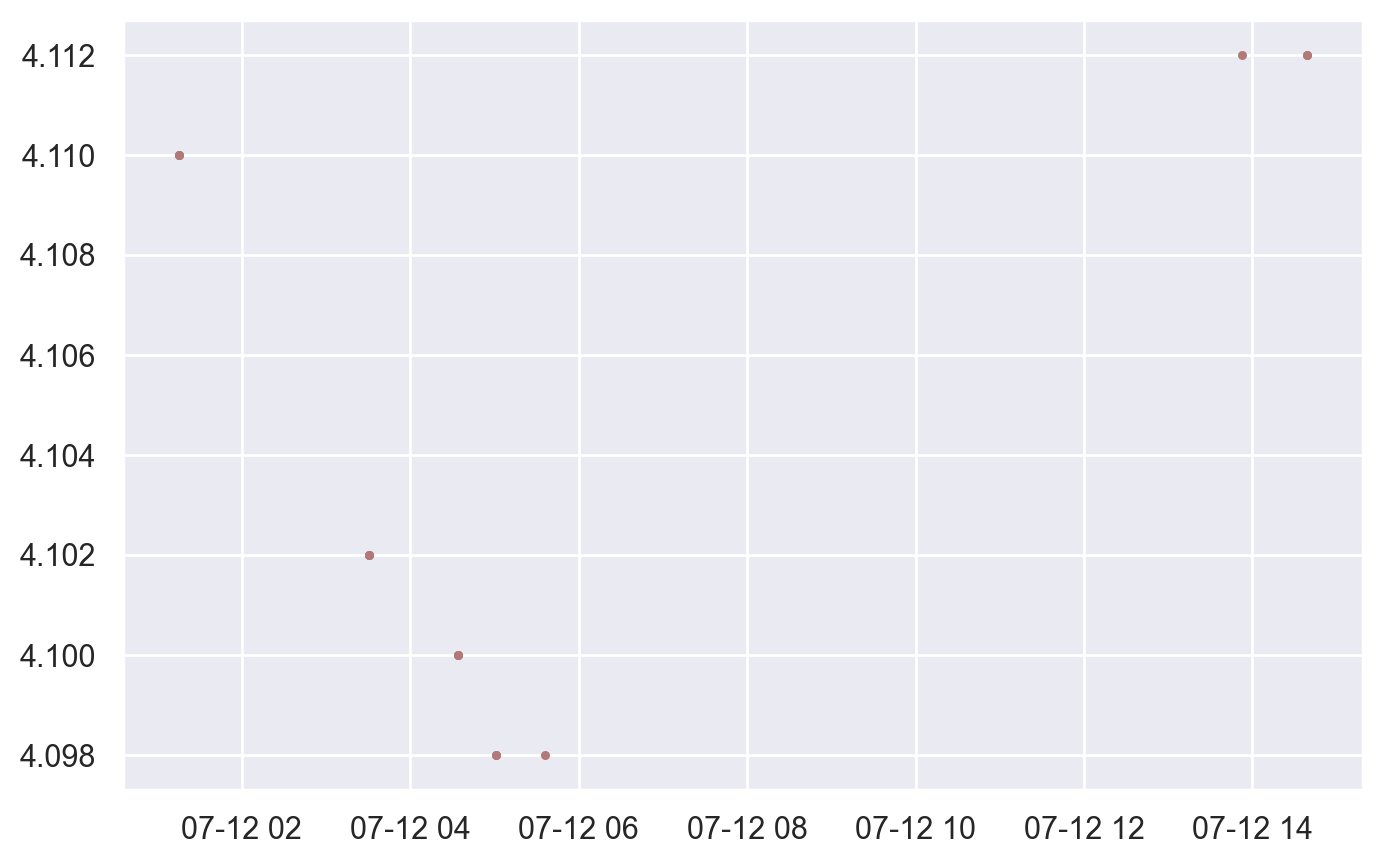

In [22]:
plt.scatter(x = pd.to_datetime(failing_df['times']), y = failing_df['batt_v'], color=np.random.rand(3,), label=key, s=5)

In [23]:
# Creating a single dataframe to store all failures

lis = []
for key, values in less_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) 
    #+ list(np.asarray(index) + 2)
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
    lis.append(failing_df)

for key, values in mostly_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) + list(np.asarray(index) - 2) + list(np.asarray(index) + 1) 
    #+ list(np.asarray(index) + 2)
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
    lis.append(failing_df)

big_fail = pd.concat(lis)
list({i for i in big_fail['gw_1_id']})

[nan,
 'mikrotik-003300',
 'irt-mudd-rooftop-gateway',
 'floodnet-ltap-gw-553232201d003500',
 'floodnet-ltap-gw-313330372b007400',
 'floodnet-ltap-gw-553232201e001500',
 'fngw-10003',
 'nyc-mocto-1',
 'floodnet-ltap-gw-553232200e001300',
 'floodnet-lr9-gw-3235313229006900',
 'eui-343632383e001c00',
 'fngw-10006',
 'ttn-nyc-00-08-00-4a-43-21',
 'ttn-nyc-00-08-00-4a-67-fe',
 'fngw-10000',
 'kona-mega']

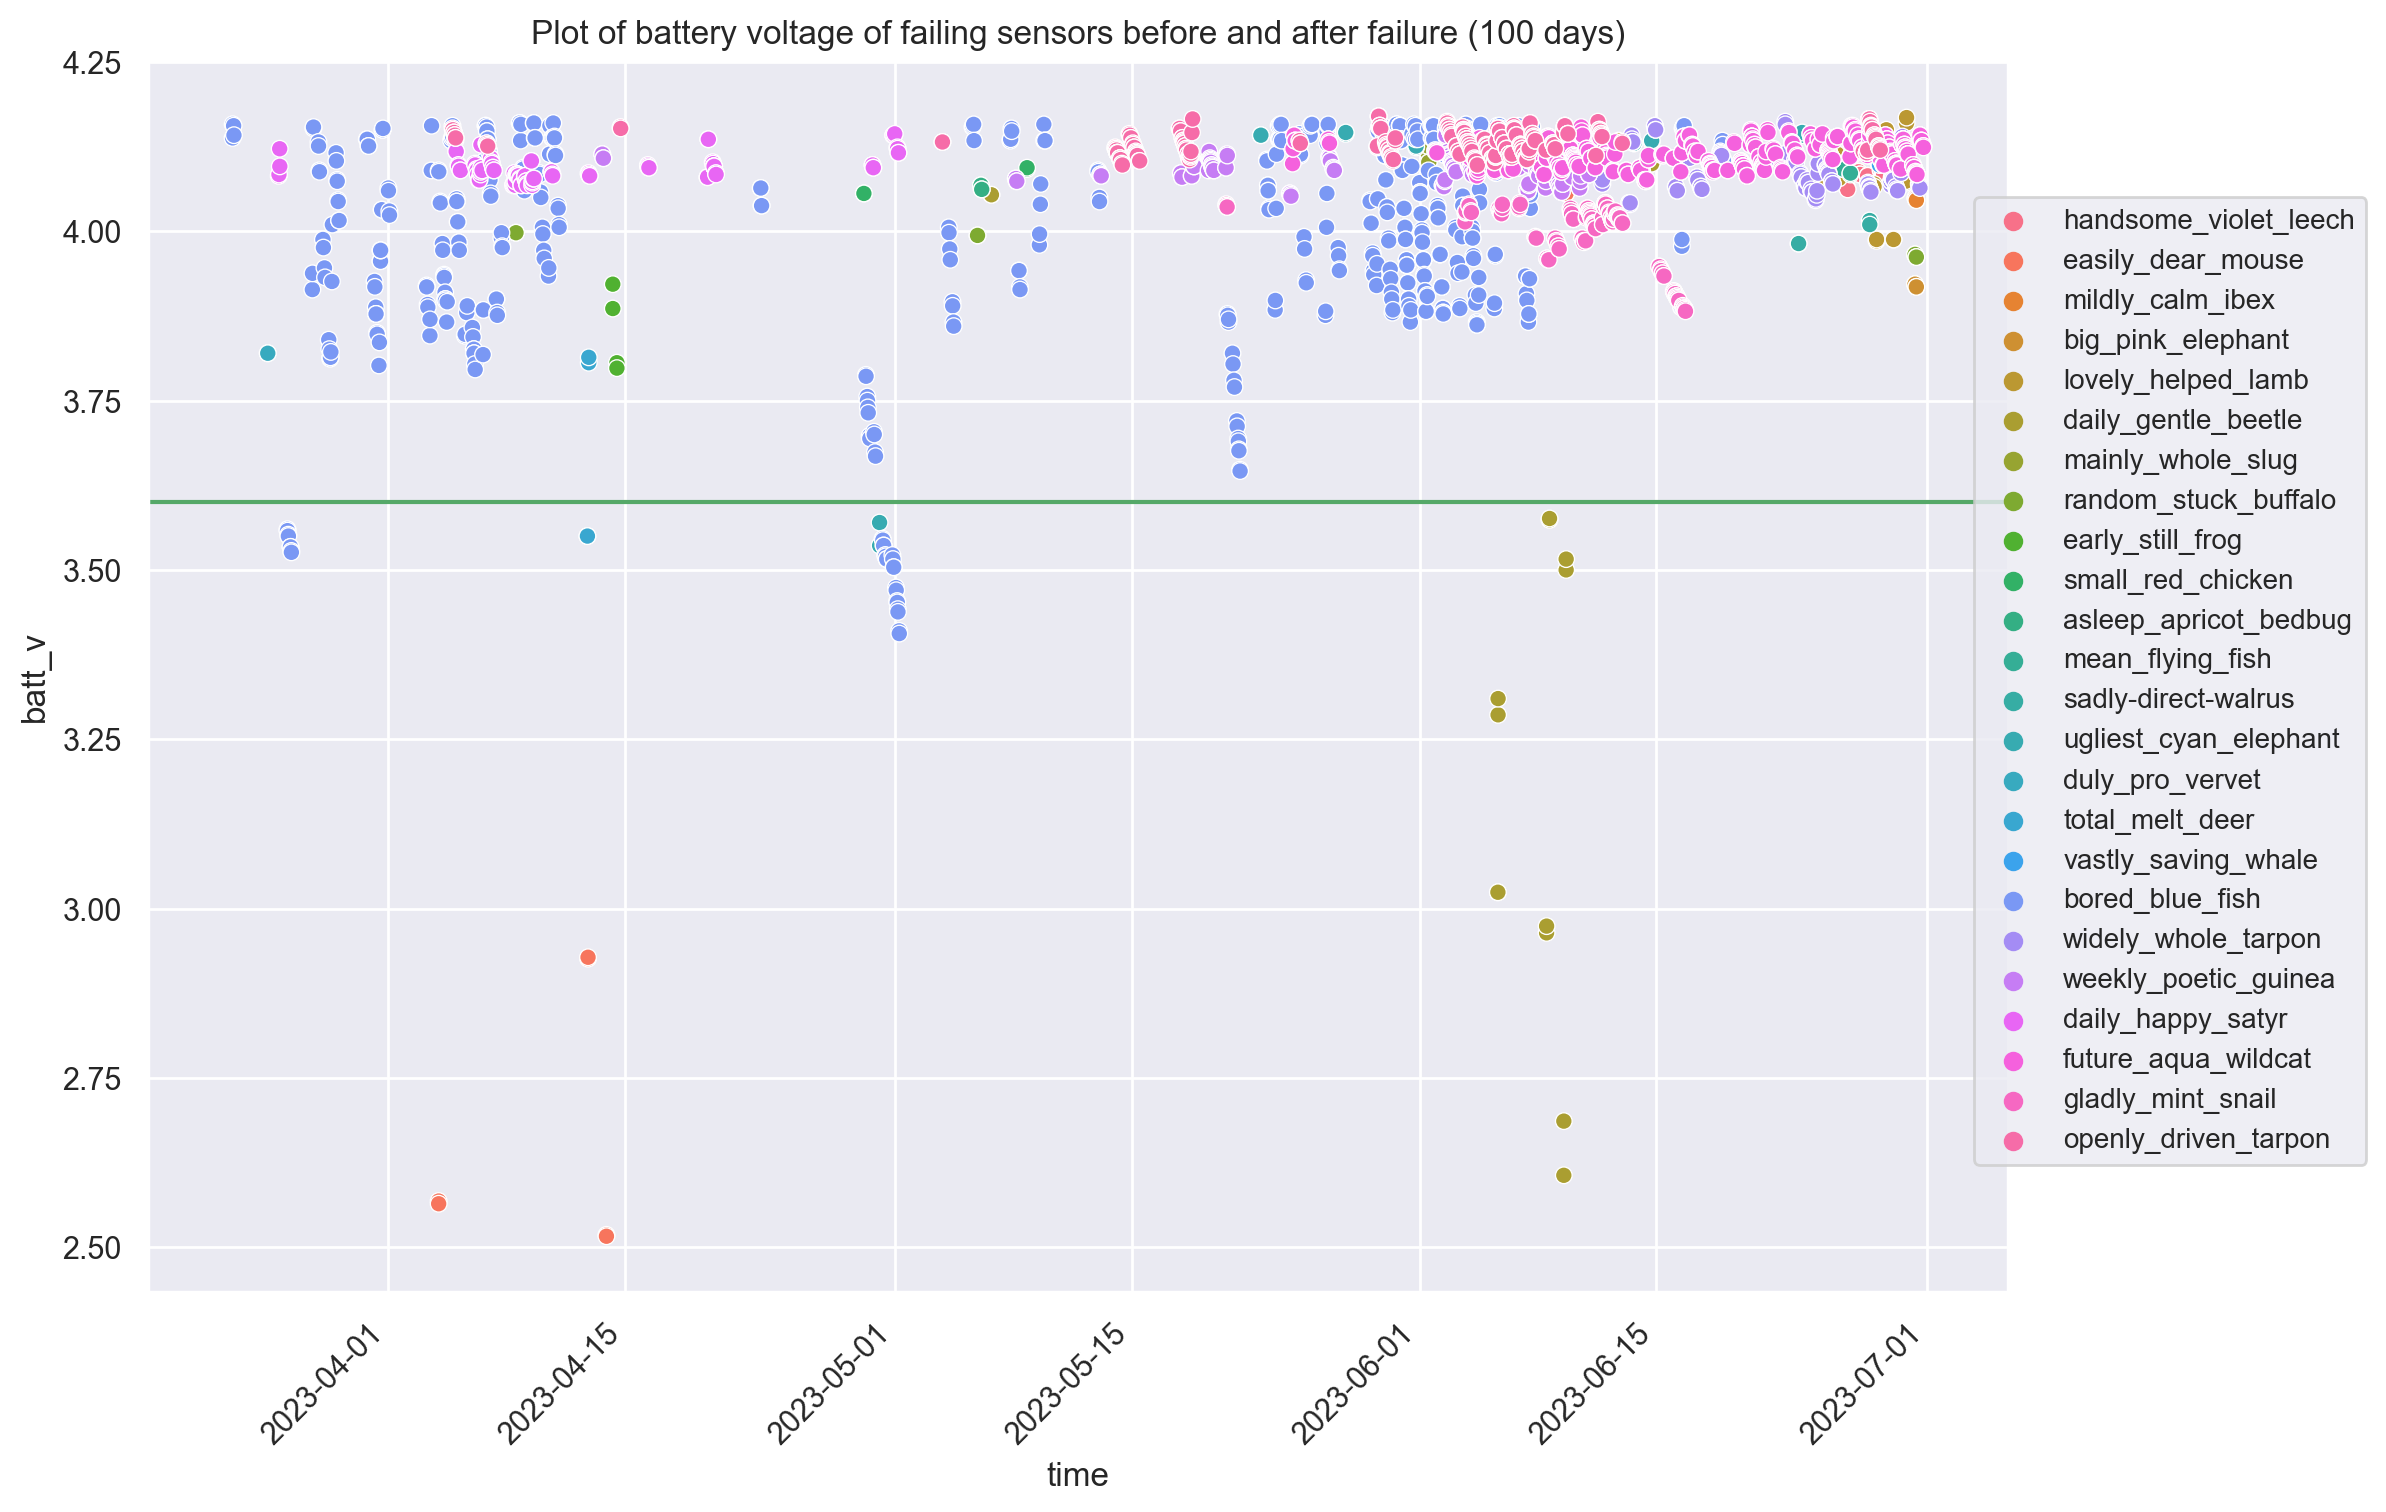

In [24]:
sns.set(rc = {'figure.figsize':(12,8)})

sns.scatterplot(data = big_fail, x = 'time', y = 'batt_v', hue = 'deployment_id')
plt.xticks(rotation=45, ha='right')
plt.title('Plot of battery voltage of failing sensors before and after failure (100 days)')
plt.legend(fontsize='small', loc='upper right',  bbox_to_anchor=(1.2, 0.9))
plt.axhline(y=3.6, color = 'g')
plt.show()

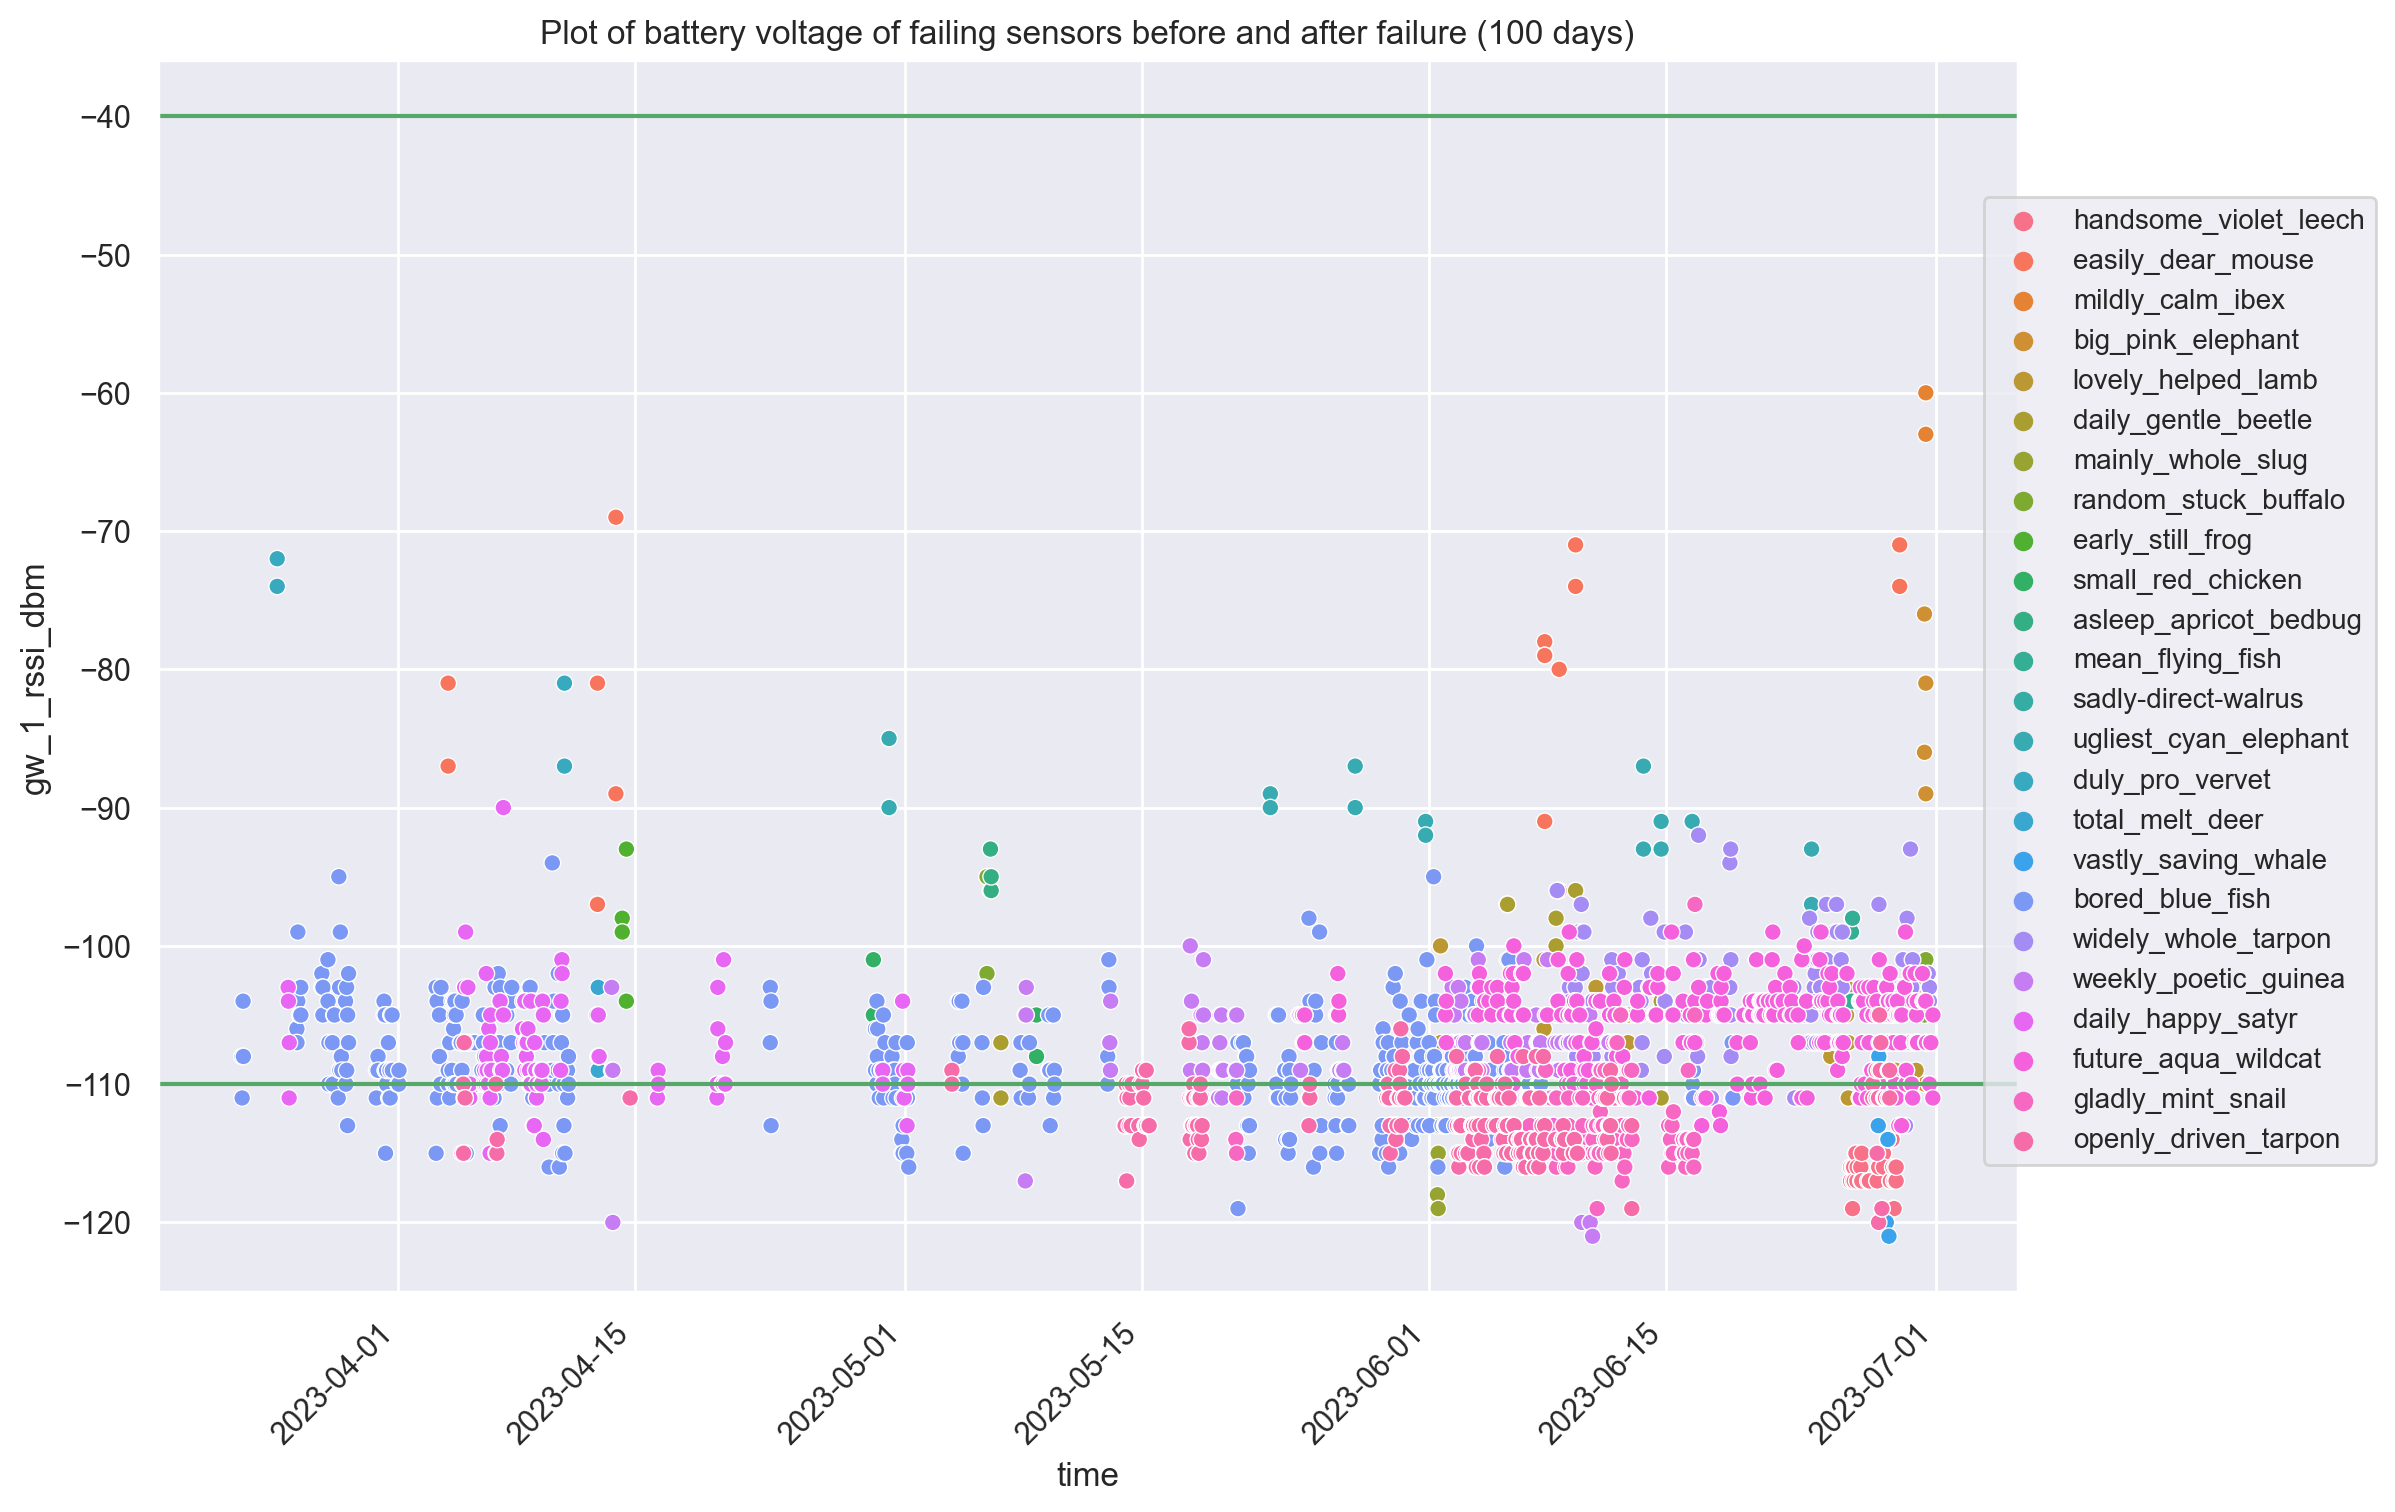

In [25]:
sns.set(rc = {'figure.figsize':(12,8)})

sns.scatterplot(data = big_fail, x = 'time', y = 'gw_1_rssi_dbm', hue = 'deployment_id')
plt.xticks(rotation=45, ha='right')
plt.title('Plot of battery voltage of failing sensors before and after failure (100 days)')
plt.legend(fontsize='small', loc='upper right',  bbox_to_anchor=(1.2, 0.9))
plt.axhline(y=-40, color = 'g')
plt.axhline(y=-110, color = 'g')
plt.show()

In [26]:
big_fail

Unnamed: 0                             time          deployment_id  \
97988       97988 2023-06-25 22:32:48.513000+00:00  handsome_violet_leech   
97989       97989 2023-06-25 22:36:59.785000+00:00  handsome_violet_leech   
97990       97990 2023-06-26 01:25:59.338000+00:00  handsome_violet_leech   
97991       97991 2023-06-26 01:27:02.728000+00:00  handsome_violet_leech   
97992       97992 2023-06-26 01:30:11.528000+00:00  handsome_violet_leech   
...           ...                              ...                    ...   
17626       17626 2023-06-28 04:04:53.303000+00:00   openly_driven_tarpon   
17627       17627 2023-06-28 04:33:17.861000+00:00   openly_driven_tarpon   
17627       17627 2023-06-28 04:33:17.861000+00:00   openly_driven_tarpon   
17628       17628 2023-06-28 05:58:29.340000+00:00   openly_driven_tarpon   
17629       17629 2023-06-28 06:11:14.481000+00:00   openly_driven_tarpon   

       error_flag  batt_v                            gw_1_id  dist_mm  \
97988         0.0   4.082  floodnet-ltap-gw-553232201e001500   2796.0   
97989         0.0   4.082  floodnet-ltap-gw-553232201e001500   2799.0   
97990         0.0   4.076  floodnet-ltap-gw-553232201e001500   2791.0   
97991         0.0   4.076  floodnet-ltap-gw-553232201e001500   2791.0   
97992         0.0   4.076  floodnet-ltap-gw-553232201e001500   2796.0   
...           ...     ...                                ...      ...   
17626         0.0   4.126                          kona-mega   2787.0   
17627         0.0   4.124                          kona-mega   2789.0   
17627         0.0   4.124                          kona-mega   2789.0   
17628         0.0   4.122                          kona-mega   2790.0   
17629         0.0   4.120                    mikrotik-003300   2790.0   

          f_cnt  gw_1_rssi_dbm  gw_1_snr_db            times        date  
97988  138367.0         -117.0         -6.5  22:32:48.513000  2023-06-25  
97989  138371.0         -116.0         -4.5  22:36:59.785000  2023-06-25  
97990  138532.0         -119.0         -8.0  01:25:59.338000  2023-06-26  
97991  138533.0         -116.0         -9.0  01:27:02.728000  2023-06-26  
97992  138536.0         -116.0         -8.0  01:30:11.528000  2023-06-26  
...         ...            ...          ...              ...         ...  
17626   35223.0         -111.0         -6.2  04:04:53.303000  2023-06-28  
17627   35251.0         -109.0         -5.5  04:33:17.861000  2023-06-28  
17627   35251.0         -109.0         -5.5  04:33:17.861000  2023-06-28  
17628   35333.0         -109.0         -5.2  05:58:29.340000  2023-06-28  
17629   35346.0         -111.0         -7.5  06:11:14.481000  2023-06-28  

[2172 rows x 12 columns]

In [27]:
## Looking how many failures in bad battery condition
c = 0
for i in big_fail['batt_v']:
    if i < 3.6:
        c = c+1
print(c)

50


In [28]:
50/4

12.5

In [29]:
## Looking how many failures in good RSSI Condition

c = 0
for i in big_fail['gw_1_rssi_dbm']:
    if i > -110:
        c = c+1
print(c)

1182


In [30]:
1182/4

295.5

## Checking if sensors changed gateway after failure

In [31]:
## creating dataframe that contains a datapoint before and a data point after failure and checking if there was change in gateway or not

liss = []
for key, values in less_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) 
    #+ list(np.asarray(index) + 2)
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0') 
    liss.append(failing_df)

for key, values in mostly_failing_data.items():
    index = list(values)
    interested_index = index + list(np.asarray(index) - 1) 
    #+ list(np.asarray(index) + 2)
    failing_df = dataframes[key].loc[interested_index].sort_values('Unnamed: 0')
    liss.append(failing_df)

failed_data = pd.concat(liss)
list({i for i in failed_data['gw_1_id']})

[nan,
 'mikrotik-003300',
 'irt-mudd-rooftop-gateway',
 'floodnet-ltap-gw-553232201d003500',
 'floodnet-ltap-gw-313330372b007400',
 'floodnet-ltap-gw-553232201e001500',
 'fngw-10003',
 'nyc-mocto-1',
 'floodnet-lr9-gw-3235313229006900',
 'floodnet-ltap-gw-553232200e001300',
 'eui-343632383e001c00',
 'fngw-10006',
 'ttn-nyc-00-08-00-4a-43-21',
 'ttn-nyc-00-08-00-4a-67-fe',
 'fngw-10000',
 'kona-mega']

In [32]:
failed_data.reset_index(inplace = True)
failed_data.shape

(1086, 13)

In [33]:
failed_data

index  Unnamed: 0                             time  \
0     97989       97989 2023-06-25 22:36:59.785000+00:00   
1     97990       97990 2023-06-26 01:25:59.338000+00:00   
2     97993       97993 2023-06-26 01:43:49.388000+00:00   
3     97994       97994 2023-06-26 02:58:21.848000+00:00   
4     98009       98009 2023-06-26 06:13:38.788000+00:00   
...     ...         ...                              ...   
1081  17622       17622 2023-06-27 22:01:27.380000+00:00   
1082  17625       17625 2023-06-28 00:05:29.683000+00:00   
1083  17626       17626 2023-06-28 04:04:53.303000+00:00   
1084  17627       17627 2023-06-28 04:33:17.861000+00:00   
1085  17628       17628 2023-06-28 05:58:29.340000+00:00   

              deployment_id  error_flag  batt_v  \
0     handsome_violet_leech         0.0   4.082   
1     handsome_violet_leech         0.0   4.076   
2     handsome_violet_leech         0.0   4.076   
3     handsome_violet_leech         0.0   4.072   
4     handsome_violet_leech         0.0   4.066   
...                     ...         ...     ...   
1081   openly_driven_tarpon         0.0   4.142   
1082   openly_driven_tarpon         0.0   4.136   
1083   openly_driven_tarpon         0.0   4.126   
1084   openly_driven_tarpon         0.0   4.124   
1085   openly_driven_tarpon         0.0   4.122   

                                gw_1_id  dist_mm     f_cnt  gw_1_rssi_dbm  \
0     floodnet-ltap-gw-553232201e001500   2799.0  138371.0         -116.0   
1     floodnet-ltap-gw-553232201e001500   2791.0  138532.0         -119.0   
2     floodnet-ltap-gw-553232201e001500   2798.0  138549.0         -117.0   
3     floodnet-ltap-gw-553232201e001500   2794.0  138620.0         -116.0   
4     floodnet-ltap-gw-553232201e001500   2792.0  138806.0         -115.0   
...                                 ...      ...       ...            ...   
1081                          kona-mega   2793.0   34875.0         -111.0   
1082                          kona-mega   2790.0   34994.0         -111.0   
1083                          kona-mega   2787.0   35223.0         -111.0   
1084                          kona-mega   2789.0   35251.0         -109.0   
1085                          kona-mega   2790.0   35333.0         -109.0   

      gw_1_snr_db            times        date  
0            -4.5  22:36:59.785000  2023-06-25  
1            -8.0  01:25:59.338000  2023-06-26  
2            -7.5  01:43:49.388000  2023-06-26  
3            -7.5  02:58:21.848000  2023-06-26  
4            -8.0  06:13:38.788000  2023-06-26  
...           ...              ...         ...  
1081         -7.8  22:01:27.380000  2023-06-27  
1082         -6.8  00:05:29.683000  2023-06-28  
1083         -6.2  04:04:53.303000  2023-06-28  
1084         -5.5  04:33:17.861000  2023-06-28  
1085         -5.2  05:58:29.340000  2023-06-28  

[1086 rows x 13 columns]

In [34]:
# checking if code works fine

c = 0
for i in range(0, 1084,2):
    if (failed_data.iloc[i]["deployment_id"] == failed_data.iloc[i+1]["deployment_id"]):
        c += 1
print(c)
    

542


In [35]:
no_gateway_switch = []

c = 0
for i in range(0, 1084,2):
    if (failed_data.iloc[i]["gw_1_id"] == failed_data.iloc[i+1]["gw_1_id"]):
        no_gateway_switch.append(failed_data.iloc[i]["deployment_id"])  
        c += 1
print(c)
    

389


In [36]:
no_gateway_switch_in_good_rssi = []

d = 0
for i in range(0, 1084,2):
    if (failed_data.iloc[i]["gw_1_id"] == failed_data.iloc[i+1]["gw_1_id"]) and failed_data.iloc[i]["gw_1_rssi_dbm"] > -110 and failed_data.iloc[i+1]["gw_1_rssi_dbm"] > -110:
        no_gateway_switch_in_good_rssi.append(failed_data.iloc[i]["deployment_id"])  
        d += 1
print(d)
    

181


In [37]:
## Analyzing status of battery

In [38]:
# sensors = ['bored_blue_fish',
#  'widely_whole_tarpon',
#  'weekly_poetic_guinea',
#  'daily_happy_satyr',
#  'future_aqua_wildcat',
#  'gladly_mint_snail',
#  'openly_driven_tarpon']
# sensors

In [39]:
totals = []
lows = []
low_battery_sensor = []
for sensor in sensors:
    df = dataframes[sensor]
    sub_df = df[df['batt_v']<3.6]
    
    total = df.dropna().shape[0]
     
    no_low = sub_df.dropna().shape[0]
    
    
    if(no_low == 0):
        continue
    totals.append(total-no_low)
    lows.append(no_low)
    low_battery_sensor.append(sensor)
    print(f"For {sensor} Total : {total}, low_batt: {no_low}")

For easily_dear_mouse Total : 19003, low_batt: 17699
For bored_blue_fish Total : 13202, low_batt: 204
For daily_gentle_beetle Total : 37548, low_batt: 405
For early_still_frog Total : 5110, low_batt: 11
For ugliest_cyan_elephant Total : 53704, low_batt: 2
For total_melt_deer Total : 109069, low_batt: 3228


In [40]:
dataframes['easily_dear_mouse'].shape

(19065, 12)

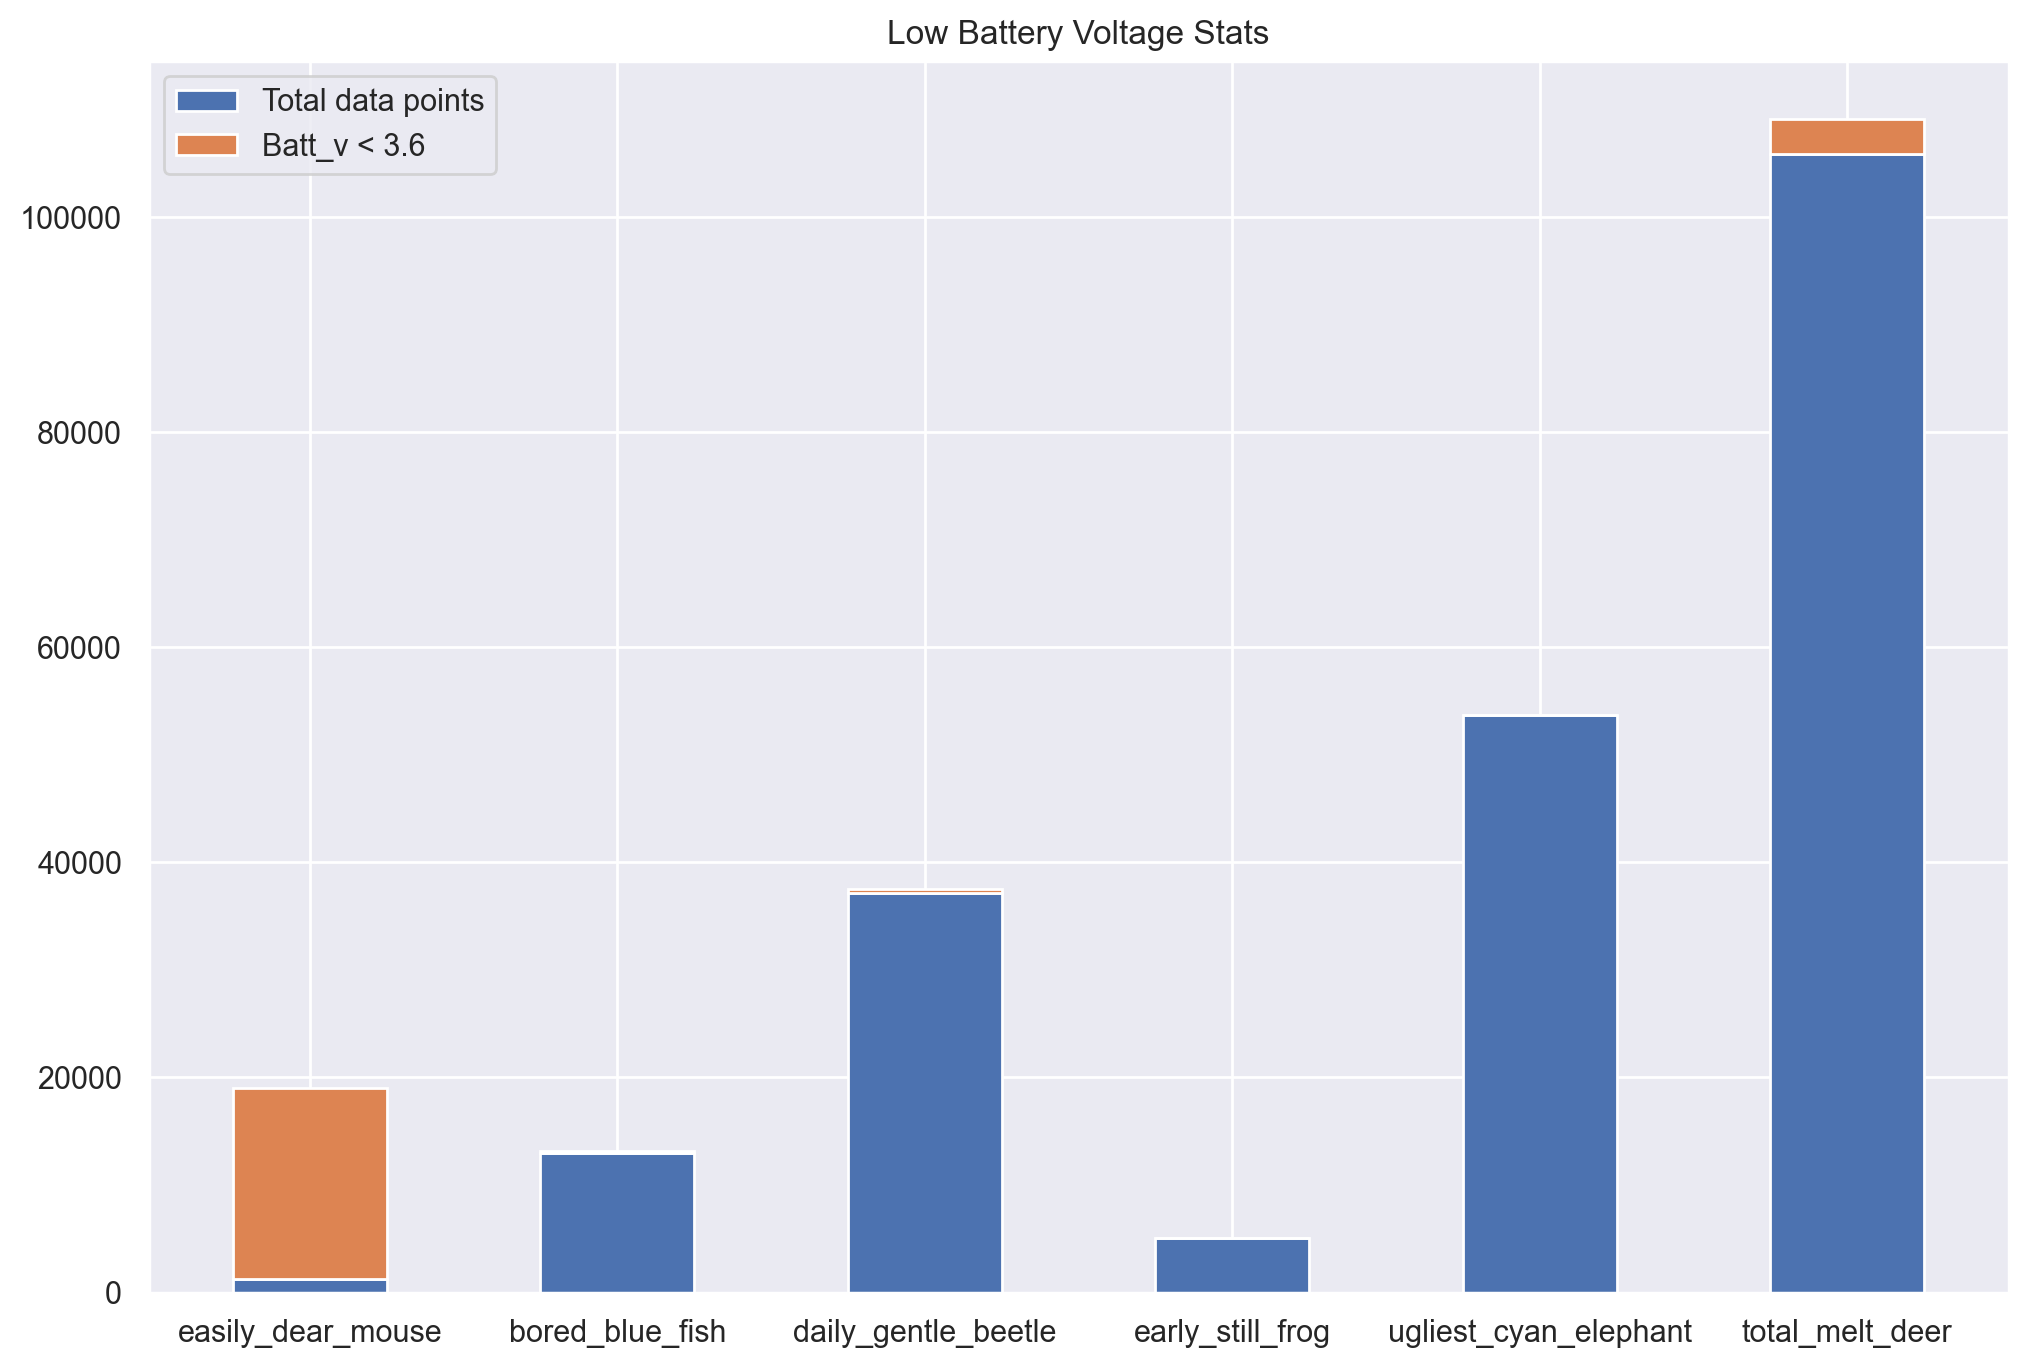

In [41]:
import matplotlib.pyplot as plt
import numpy as np



weight_counts = {
    "Total data points": np.array(totals),
    "Batt_v < 3.6": np.array(lows),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(6)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(tuple(low_battery_sensor), weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Low Battery Voltage Stats")
ax.legend(loc="upper left")

plt.show()

In [42]:
totals

[1304, 12998, 37143, 5099, 53702, 105841]